# House Prices Prediction (Kaggle)

### Alexindata 03/16/2017

## A. Intro: 

### The Ames House Prices dataset was compiled by Dean De Cock and is used by Kaggle.com in the "House Prices: Advanced Regression Techniques" competition. 

### This Jupyter notebook uses machine learning algorithm to predict house prices. The csv file containing the predicted prices is then submitted to Kaggle.com and scored.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
pd.options.display.max_rows = None
pd.options.display.max_columns = None


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 4

In [3]:
train_data = pd.read_csv('train.csv', header=0)
test_data = pd.read_csv('test.csv', header=0)
test_data.loc[:, 'SalePrice'] = np.nan # important to assign as np.nan and not as None to maintain data type as float!
frames = [train_data, test_data]
data = pd.concat(frames, axis=0, join='inner', ignore_index=True, keys=None, levels=None, names=None, verify_integrity=False, copy=True) # ignore_index=True
print(data.shape)
display(data[:3])
display(data[-3:])


(2919, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn         2.0       548.0         TA   
1     Attchd       1976.0          RFn         2.0       460.0         TA   
2     Attchd       2001.0          RFn         2.0       608.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal   208500.0  
1       WD        Normal   181500.0  
2       WD        Normal   223500.0

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2916         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2916       Norm     1Fam     1Story            5            7       1960   
2917       Norm     1Fam     SFoyer            5            5       1992   
2918       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2916          1996     Gable  CompShg     VinylSd     VinylSd       None   
2917          1992     Gable  CompShg     HdBoard     Wd Shng       None   
2918          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2916         0.0        TA        TA     CBlock       TA       TA   
2917         0.0        TA        TA      PConc       Gd       TA   
2918        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2916           No          ALQ      1224.0          Unf         0.0   
2917           Av          GLQ       337.0          Unf         0.0   
2918           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2916        0.0       1224.0    GasA        Ex          Y      SBrkr   
2917      575.0        912.0    GasA        TA          Y      SBrkr   
2918      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2916      1224         0             0       1224           1.0           0.0   
2917       970         0             0        970           0.0           1.0   
2918       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2916         1         0             4             1          TA   
2917         1         0             3             1          TA   
2918         2         1             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2916             7        Typ           1          TA     Detchd       1960.0   
2917             6        Typ           0         NaN        NaN          NaN   
2918             9        Typ           1          TA     Attchd       1993.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2916          Unf         2.0       576.0         TA         TA          Y   
2917          NaN         0.0         0.0        NaN        NaN          Y   
2918          Fin         3.0       650.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2916         474            0              0          0            0   
2917          80           32              0          0            0   
2918         190           48              0          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2916         0    NaN    NaN         NaN        0       9    2006       WD   
2917         0    NaN  MnPrv        Shed      700       7    2006       WD   
2918         0    NaN    NaN         NaN        0      11    2006       WD   

     SaleCondition  SalePrice  
2916       Abnorml        NaN  
2917        Normal        NaN  

In [4]:
train_size = train_data.shape[0]
test_size = test_data.shape[0]
print('There are {} entries in train_data; {} entries in test_data.'.format(train_size, test_size))

There are 1460 entries in train_data; 1459 entries in test_data.


## B. Feature engineering

### 1-1. Generate 'Age', 'AgeRemod', and 'AgeGarage' from 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'
### 1-2. Drop 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt' after completion.

In [5]:
data.shape

(2919, 81)

In [6]:
data['Age'] = data['YrSold'] - data['YearBuilt']
data['AgeRemod'] = data['YrSold'] - data['YearRemodAdd']
data['AgeGarage'] = data['YrSold'] - data['GarageYrBlt']
data.drop(data[['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']], axis=1, inplace=True)

### 2. Drop additional columns: 'MoSold', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'PoolArea', 'MiscVal', 'ScreenPorch', '3SnsPorch', 'EnclosedPorch', 'OpenPorchSF', 'PoolQC', 'Fence', 'Utilities', 'BsmtFinType2', 'LandSlope', 'LotConfig', 'Condition2', 'RoofMatl', 'Heating', 'Street'

In [7]:
data.drop(data[['MoSold', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'PoolArea', 'MiscVal', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF',  'PoolQC', 'Fence', 'Utilities']], axis=1, inplace=True)
data.drop(data[['BsmtFinType2', 'LandSlope', 'LotConfig']], axis=1, inplace=True)
data.drop(data[['Condition2', 'RoofMatl', 'Heating', 'Street']], axis=1, inplace=True)

data.shape

(2919, 60)

### 3. Change 'MSSubClass' variable to categorical type

In [8]:
data['MSSubClass'] = data['MSSubClass'].astype(str)

### 4. Change 'OverallCond' variable to categorical type by binning 1-4, 5, 6-8, 9

In [9]:
# bin OverallCond 1-4, 5, 6-8, 9
data['OverallCond_f'] = np.nan  # always initiate with np.nan

cond_1234 = [1, 2, 3, 4]
cond_5 = [5]
cond_678 = [6, 7, 8]
cond_9 = [9]

# fastest re-assign value in python pandas with df.set_value()
data.set_value(data['OverallCond'].isin(cond_1234), 'OverallCond_f', 'cond_1234')
data.set_value(data['OverallCond'] == 5, 'OverallCond_f', 'cond_5')
data.set_value(data['OverallCond'].isin(cond_678), 'OverallCond_f', 'cond_678')
data.set_value(data['OverallCond'] == 9, 'OverallCond_f', 'cond_9')

data.drop(data[['OverallCond']], axis=1, inplace=True)
data.shape

(2919, 60)

### 5-1. Split left-skewed, zero-inflated variables to 1 categorical + 1 modified numeric variables: '2ndFlrSF', 'BsmtFinSF1', 'MasVnrArea', 'WoodDeckSF'

### 5-2: Remove entries with '0' values in the original variable

In [10]:
# generate a new categorical variable for is_zero, not_zero
data['2ndFlrSF_f'] = np.nan
data.set_value((data['2ndFlrSF'] == 0), '2ndFlrSF_f', 'is_zero')
data.set_value( ~(data['2ndFlrSF'] == 0), '2ndFlrSF_f', 'not_zero') # watch out position of "~"

# remove "0" entries in original variable
data.set_value( (data['2ndFlrSF'] == 0), '2ndFlrSF', np.nan )
data.shape

(2919, 61)

In [11]:
# generate a new categorical
data['BsmtFinSF1_f'] = np.nan
data.set_value(data['BsmtFinSF1'] == 0, 'BsmtFinSF1_f', 'is_zero')
data.set_value( ~(data['BsmtFinSF1'] == 0), 'BsmtFinSF1_f', 'not_zero')

# remove "0"
data.set_value(data['BsmtFinSF1'] == 0, 'BsmtFinSF1', np.nan)
data.shape


(2919, 62)

In [12]:
# generate a new categorical
data['MasVnrArea_f'] = np.nan
data.set_value(data['MasVnrArea'] == 0, 'MasVnrArea_f', 'is_zero')
data.set_value( ~(data['MasVnrArea'] == 0), 'MasVnrArea_f', 'not_zero')

#
data.set_value(data['MasVnrArea'] == 0, 'MasVnrArea', np.nan)
data.shape

(2919, 63)

In [13]:
# generate a new categorical
data['WoodDeckSF_f'] = np.nan
data.set_value(data['WoodDeckSF'] == 0, 'WoodDeckSF_f', 'is_zero')
data.set_value( ~(data['WoodDeckSF'] == 0), 'WoodDeckSF_f', 'not_zero')
data.set_value(data['WoodDeckSF'] == 0, 'WoodDeckSF', np.nan)

#
data.set_value(data['WoodDeckSF'] == 0, 'WoodDeckSF', np.nan)
data.shape

(2919, 64)

### 6. Change 'LotFrontage', 'LotArea', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea' variables by removing upper outliers ( > 4 std's)

In [14]:
# check number of entries that are outliers in 'LotFrontage'
pd.value_counts(data['LotFrontage'] - data['LotFrontage'].mean() > 4 * data['LotFrontage'].std() )

False    2911
True        8
Name: LotFrontage, dtype: int64

In [15]:
LotFrontage_outliers = data['LotFrontage'] - data['LotFrontage'].mean() > 4 * data['LotFrontage'].std()
data.set_value( LotFrontage_outliers, 'LotFrontage', np.nan )
data.shape


(2919, 64)

In [16]:
# check number of entries that are outliers in 'LotArea'
pd.value_counts(data['LotArea'] - data['LotArea'].mean() > 4 * data['LotArea'].std())

False    2900
True       19
Name: LotArea, dtype: int64

In [17]:
LotArea_outliers = (data['LotArea'] - data['LotArea'].mean()) > 4 * data['LotArea'].std()
data.set_value( LotArea_outliers, 'LotArea', np.nan )
data.shape


(2919, 64)

In [18]:
# outliers in 'TotalBsmtSF'
pd.value_counts(data['TotalBsmtSF'] - data['TotalBsmtSF'].mean() > 4 * data['TotalBsmtSF'].std())


False    2912
True        7
Name: TotalBsmtSF, dtype: int64

In [19]:
TotalBsmtSF_outliers = (data['TotalBsmtSF'] - data['TotalBsmtSF'].mean()) > 4 * data['TotalBsmtSF'].std()
data.set_value( TotalBsmtSF_outliers, 'TotalBsmtSF', np.nan )
data.shape

(2919, 64)

In [20]:
# outliers in 'BsmtFinSF1'
pd.value_counts(data['BsmtFinSF1'] - data['BsmtFinSF1'].mean() > 4 * data['BsmtFinSF1'].std())


False    2917
True        2
Name: BsmtFinSF1, dtype: int64

In [21]:
BsmtFinSF1_outliers = (data['BsmtFinSF1'] - data['BsmtFinSF1'].mean()) > 4 * data['BsmtFinSF1'].std()
data.set_value( BsmtFinSF1_outliers, 'BsmtFinSF1', np.nan )
data.shape

(2919, 64)

In [22]:
# outliers in '1stFlrSF'
pd.value_counts(data['1stFlrSF'] - data['1stFlrSF'].mean() > 4 * data['1stFlrSF'].std())


False    2913
True        6
Name: 1stFlrSF, dtype: int64

In [23]:
LstFlrSF_outliers = (data['1stFlrSF'] - data['1stFlrSF'].mean()) > 4 * data['1stFlrSF'].std()
data.set_value( LstFlrSF_outliers, '1stFlrSF', np.nan )
data.shape

(2919, 64)

In [24]:
# outliers in 'GrLivArea'
pd.value_counts(data['GrLivArea'] - data['GrLivArea'].mean() > 4 * data['GrLivArea'].std())


False    2910
True        9
Name: GrLivArea, dtype: int64

In [25]:
GrLivArea_outliers = (data['GrLivArea'] - data['GrLivArea'].mean()) > 4 * data['GrLivArea'].std()
data.set_value( GrLivArea_outliers, 'GrLivArea', np.nan )
data.shape

(2919, 64)

### 7-1. Change a group of categorical variables to ordinal variables:

### 7-2. 'HeatingQC', 'GarageCond', 'GarageQual', 'KitchenQual', 'FireplaceQu', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'ExterQual', 'ExterCond', 'BsmtExposure'

### 7-3. Missing values in the variables are treated as value "0".

### 7-4. After conversion, drop each original variables.

In [26]:
# HeatingQC
print(pd.value_counts(data['HeatingQC']))
print(data['HeatingQC'].isnull().sum())

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64
0


In [27]:
# map value to new column
data['HeatingQC_n'] = np.nan
# data['HeatingQC_n'] = data['HeatingQC'].map( {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4} ).astype(int)
# it is not necessary to force int data types, not using .astype(int) will end up as float
data['HeatingQC_n'] = data['HeatingQC'].map( {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4} )

# drop original column
data.drop(data[['HeatingQC']], axis=1, inplace=True)
data.shape

(2919, 64)

In [28]:
# KitchenQual
print(pd.value_counts(data['KitchenQual']))
print(data['KitchenQual'].isnull().sum())


TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64
1


In [29]:
data['KitchenQual_n'] = np.nan
data['KitchenQual_n'] = data['KitchenQual'].map( {'Fa':0, 'TA':1, 'Gd':2, 'Ex':3} )
print(data[['KitchenQual_n', 'SalePrice']].corr().SalePrice) # 0.66 is good

# drop
data.drop(data[['KitchenQual']], axis=1, inplace=True)

KitchenQual_n    0.6596
SalePrice        1.0000
Name: SalePrice, dtype: float64


In [30]:
# FireplaceQu
print(pd.value_counts(data['FireplaceQu']))
print(data['FireplaceQu'].isnull().sum())

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
1420


In [31]:
#15 - map value to new column
data['FireplaceQu_n'] = np.nan
data['FireplaceQu_n'] = data['FireplaceQu'].map( {np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5} ).astype(int)
print(data[['FireplaceQu_n', 'SalePrice']].corr().SalePrice) # 0.52 is good

# drop
data.drop(data[['FireplaceQu']], axis=1, inplace=True)
data.shape

FireplaceQu_n    0.520438
SalePrice        1.000000
Name: SalePrice, dtype: float64


(2919, 64)

In [32]:
# BsmtCond
print(pd.value_counts(data['BsmtCond']))
print(data['BsmtCond'].isnull().sum())

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
82


In [33]:
# map value to new column
data['BsmtCond_n'] = np.nan
data['BsmtCond_n'] = data['BsmtCond'].map( {np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4} ).astype(int)
print(data[['BsmtCond_n', 'SalePrice']].corr().SalePrice) # 0.21å is good

#
data.drop(data[['BsmtCond']], axis=1, inplace=True)
data.shape

BsmtCond_n    0.212607
SalePrice     1.000000
Name: SalePrice, dtype: float64


(2919, 64)

In [34]:
# BsmtQual
print(pd.value_counts(data['BsmtQual']))
print(data['BsmtQual'].isnull().sum())

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
81


In [35]:
# map value to new column
data['BsmtQual_n'] = data['BsmtQual'].map( {np.nan:0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4} ).astype(int)
print(data[['BsmtQual_n', 'SalePrice']].corr().SalePrice) # 0.62 is good

#
data.drop(data[['BsmtQual']], axis=1, inplace=True)
data.shape

BsmtQual_n    0.622925
SalePrice     1.000000
Name: SalePrice, dtype: float64


(2919, 64)

In [36]:
# ExterCond
print(pd.value_counts(data['ExterCond']))
print(data['ExterCond'].isnull().sum())

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64
0


In [37]:
# map value to new column
data['ExterCond_n'] = data['ExterCond'].map( {'Po':0, 'Fa':1, 'TA':3, 'Gd':2, 'Ex':4} ).astype(int)
print(data[['ExterCond_n', 'SalePrice']].corr().SalePrice) # 0.138

#
data.drop(data[['ExterCond']], axis=1, inplace=True)
data.shape

ExterCond_n    0.138026
SalePrice      1.000000
Name: SalePrice, dtype: float64


(2919, 64)

In [38]:
# ExterQual
print(pd.value_counts(data['ExterQual']))
print(data['ExterQual'].isnull().sum())

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64
0


In [39]:
# map value to new column
data['ExterQual_n'] = data['ExterQual'].map( {'Fa':0, 'TA':1, 'Gd':2, 'Ex':3} ).astype(int)
print(data[['ExterQual_n', 'SalePrice']].corr().SalePrice) # 0.68 is good

#
data.drop(data[['ExterQual']], axis=1, inplace=True)
data.shape

ExterQual_n    0.682639
SalePrice      1.000000
Name: SalePrice, dtype: float64


(2919, 64)

In [40]:
# BsmtExposure
print(pd.value_counts(data['BsmtExposure']))
print(data['BsmtExposure'].isnull().sum())

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
82


In [41]:
# map value to new column
data['BsmtExposure_n'] = data['BsmtExposure'].map( {np.nan:0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4} ).astype(int)
print(data[['BsmtExposure_n', 'SalePrice']].corr().SalePrice) # 0.37

#
data.drop(data[['BsmtExposure']], axis=1, inplace=True)
data.shape

BsmtExposure_n    0.374696
SalePrice         1.000000
Name: SalePrice, dtype: float64


(2919, 64)

In [42]:
# BsmtFinType1
print(pd.value_counts(data['BsmtFinType1']))
print(data['BsmtFinType1'].isnull().sum())

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
79


In [43]:
# BsmtFinType1 does not have correlating trend with SalePrice, split into GLQ vs rest
data['BsmtFinType1_f'] = np.nan
data.set_value(data['BsmtFinType1'] == 'GLQ', ['BsmtFinType1_f'], 'GLQ')
data.set_value(data['BsmtFinType1'].isin(['Unf', 'ALQ', 'BLQ', 'Rec', 'LwQ', np.nan]), ['BsmtFinType1_f'], 'Other')

# drop original
data.drop(data[['BsmtFinType1']], axis=1, inplace=True)
data.shape

(2919, 64)

In [44]:
# GarageCond
print(pd.value_counts(data['GarageCond']))
print(data['GarageCond'].isnull().sum())

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64
159


In [45]:
# map value to new column
data['GarageCond_n'] = data['GarageCond'].map( {np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5} ).astype(int)
print(data[['GarageCond_n', 'SalePrice']].corr().SalePrice) # 0.37

#
data.drop(data[['GarageCond']], axis=1, inplace=True)
data.shape

GarageCond_n    0.263191
SalePrice       1.000000
Name: SalePrice, dtype: float64


(2919, 64)

In [46]:
# GarageQual
print(pd.value_counts(data['GarageQual']))
data['GarageQual'].isnull().sum()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64


159

In [47]:
# map value to new column
data['GarageQual_n'] = data['GarageQual'].map( {np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5} ).astype(int)
print(data[['GarageQual_n', 'SalePrice']].corr().SalePrice) # 0.27

#
data.drop(data[['GarageQual']], axis=1, inplace=True)
data.shape

GarageQual_n    0.273839
SalePrice       1.000000
Name: SalePrice, dtype: float64


(2919, 64)

In [48]:
data[:3]

Id MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1         60       RL         65.0   8450.0   NaN      Reg         Lvl   
1   2         20       RL         80.0   9600.0   NaN      Reg         Lvl   
2   3         60       RL         68.0  11250.0   NaN      IR1         Lvl   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual RoofStyle  \
0      CollgCr       Norm     1Fam     2Story            7     Gable   
1      Veenker      Feedr     1Fam     1Story            6     Gable   
2      CollgCr       Norm     1Fam     2Story            7     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea Foundation  BsmtFinSF1  \
0     VinylSd     VinylSd    BrkFace       196.0      PConc       706.0   
1     MetalSd     MetalSd       None         NaN     CBlock       978.0   
2     VinylSd     VinylSd    BrkFace       162.0      PConc       486.0   

   BsmtUnfSF  TotalBsmtSF CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0      150.0        856.0          Y      SBrkr     856.0     854.0   
1      284.0       1262.0          Y      SBrkr    1262.0       NaN   
2      434.0        920.0          Y      SBrkr     920.0     866.0   

   GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0     1710.0           1.0         2         1             3             1   
1     1262.0           0.0         2         0             3             1   
2     1786.0           1.0         2         1             3             1   

   TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  GarageCars  \
0             8        Typ           0     Attchd          RFn         2.0   
1             6        Typ           1     Attchd          RFn         2.0   
2             6        Typ           1     Attchd          RFn         2.0   

   GarageArea PavedDrive  WoodDeckSF MiscFeature SaleType SaleCondition  \
0       548.0          Y         NaN         NaN       WD        Normal   
1       460.0          Y       298.0         NaN       WD        Normal   
2       608.0          Y         NaN         NaN       WD        Normal   

   SalePrice  Age  AgeRemod  AgeGarage OverallCond_f 2ndFlrSF_f BsmtFinSF1_f  \
0   208500.0    5         5        5.0        cond_5   not_zero     not_zero   
1   181500.0   31        31       31.0      cond_678    is_zero     not_zero   
2   223500.0    7         6        7.0        cond_5   not_zero     not_zero   

  MasVnrArea_f WoodDeckSF_f  HeatingQC_n  KitchenQual_n  FireplaceQu_n  \
0     not_zero      is_zero            4            2.0              0   
1      is_zero     not_zero            4            1.0              3   
2     not_zero      is_zero            4            2.0              3   

   BsmtCond_n  BsmtQual_n  ExterCond_n  ExterQual_n  BsmtExposure_n  \
0           3           3            3            2               1   
1           3           3            3            1               4   
2           3           3            3            2               2   

  BsmtFinType1_f  GarageCond_n  GarageQual_n  
0            GLQ             3             3  
1          Other             3             3  
2            GLQ             3             3

### 8. Drop newly generated variables that are weak: 'BsmtFinSF1_f', '2ndFlrSF_f'

In [49]:
data.drop(data[['BsmtFinSF1_f', '2ndFlrSF_f']], axis=1, inplace=True)
data.shape

(2919, 62)

### 9. Check the sparseness of the levels in some categorical variables:

### Variables: 'Condition1', 'Exterior1st', 'Exterior2nd', 'Electrical', 'Functional', 'MiscFeature'

In [50]:
display(pd.value_counts(data['Condition1']))
data['Condition1'].isnull().sum()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

0

In [51]:
data.set_value(data['Condition1'].isin(['RRNn', 'RRNe']), 'Condition1', 'RRNne')
display(pd.value_counts(data['Condition1']))
data['Condition1'].isnull().sum()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNne       15
Name: Condition1, dtype: int64

0

In [52]:
display(pd.value_counts(data['Exterior1st']))
data['Exterior1st'].isnull().sum()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

1

In [53]:
data.set_value(data['Exterior1st'].isin(['BrkComm', 'AsphShn', 'Stone', 'CBlock', 'ImStucc']), 'Exterior1st', 'Other')
display(pd.value_counts(data['Exterior1st']))
data['Exterior1st'].isnull().sum()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
Other        13
Name: Exterior1st, dtype: int64

1

In [54]:
display(pd.value_counts(data['Exterior2nd']))
data['Exterior2nd'].isnull().sum()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

1

In [55]:
data.set_value(data['Exterior2nd'].isin(['Stone', 'AsphShn', 'CBlock']), 'Exterior2nd', 'Other')
display(pd.value_counts(data['Exterior2nd']))
data['Exterior2nd'].isnull().sum()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Other        14
Name: Exterior2nd, dtype: int64

1

In [56]:
# 'Electrical'
display(pd.value_counts(data['Electrical']))
data['Electrical'].isnull().sum()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

1

In [57]:
data.set_value(data['Electrical'] == 'Mix', 'Electrical', np.nan)
display(pd.value_counts(data['Electrical']))
data['Electrical'].isnull().sum()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Name: Electrical, dtype: int64

2

In [58]:
# Functional
display(pd.value_counts(data['Functional']))
data['Functional'].isnull().sum()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

2

In [59]:
data.set_value(data['Functional'] == 'Sev', 'Functional', 'Typ')
display(pd.value_counts(data['Functional']))
data['Functional'].isnull().sum()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Name: Functional, dtype: int64

2

In [60]:
# 'MiscFeature'
display(pd.value_counts(data['MiscFeature']))
data['MiscFeature'].isnull().sum()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

2814

In [61]:
data.set_value(data['MiscFeature'] == 'TenC', 'MiscFeature', np.nan)
display(pd.value_counts(data['MiscFeature']))
data['MiscFeature'].isnull().sum()

Shed    95
Gar2     5
Othr     4
Name: MiscFeature, dtype: int64

2815

In [62]:
for col in data:
    if data[col].dtypes == object:
        print('{}:'.format(col))
        display(pd.value_counts(data[col]))
        print(data[col].isnull().sum())
        print()

MSSubClass:


20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

0

MSZoning:


RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

4

Alley:


Grvl    120
Pave     78
Name: Alley, dtype: int64

2721

LotShape:


Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

0

LandContour:


Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

0

Neighborhood:


NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

0

Condition1:


Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNne       15
Name: Condition1, dtype: int64

0

BldgType:


1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

0

HouseStyle:


1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

0

RoofStyle:


Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

0

Exterior1st:


VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
Other        13
Name: Exterior1st, dtype: int64

1

Exterior2nd:


VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Other        14
Name: Exterior2nd, dtype: int64

1

MasVnrType:


None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

24

Foundation:


PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

0

CentralAir:


Y    2723
N     196
Name: CentralAir, dtype: int64

0

Electrical:


SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Name: Electrical, dtype: int64

2

Functional:


Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Name: Functional, dtype: int64

2

GarageType:


Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

157

GarageFinish:


Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

159

PavedDrive:


Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

0

MiscFeature:


Shed    95
Gar2     5
Othr     4
Name: MiscFeature, dtype: int64

2815

SaleType:


WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

1

SaleCondition:


Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

0

OverallCond_f:


cond_5       1645
cond_678     1065
cond_1234     168
cond_9         41
Name: OverallCond_f, dtype: int64

0

MasVnrArea_f:


is_zero     1738
not_zero    1181
Name: MasVnrArea_f, dtype: int64

0

WoodDeckSF_f:


is_zero     1523
not_zero    1396
Name: WoodDeckSF_f, dtype: int64

0

BsmtFinType1_f:


Other    2070
GLQ       849
Name: BsmtFinType1_f, dtype: int64

0



## C. Visualization of relationship between features and SalePrice

/Users/weiwei/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


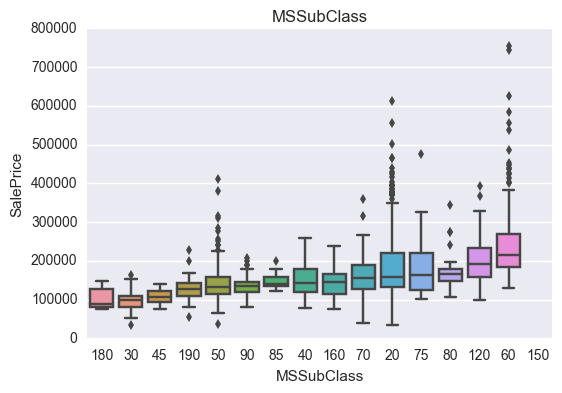

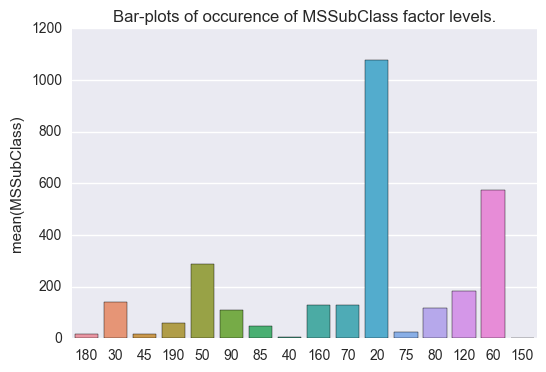

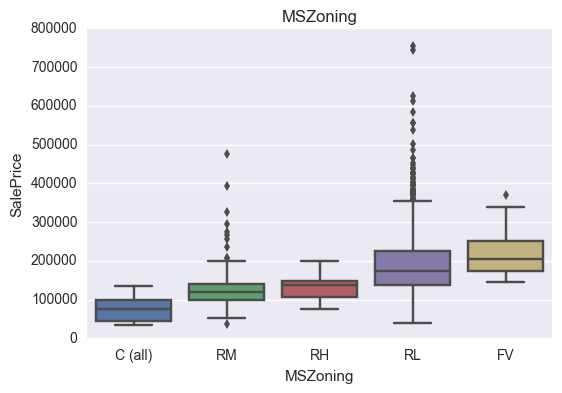

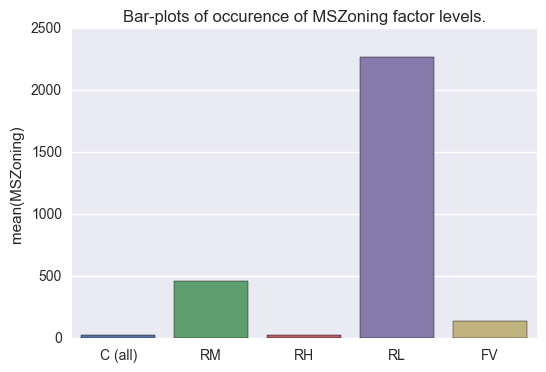

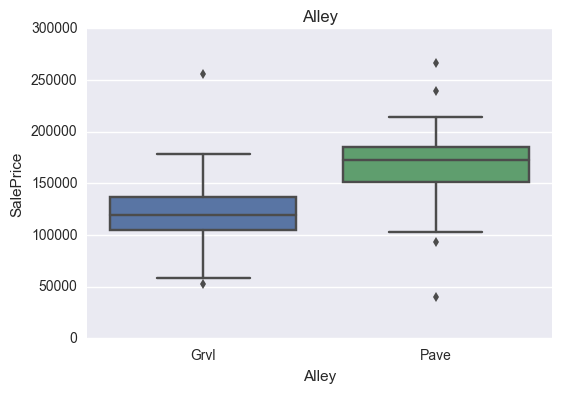

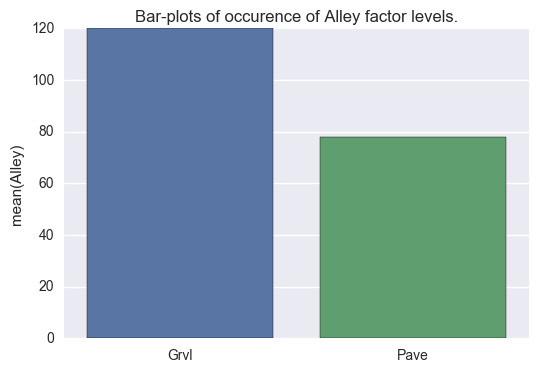

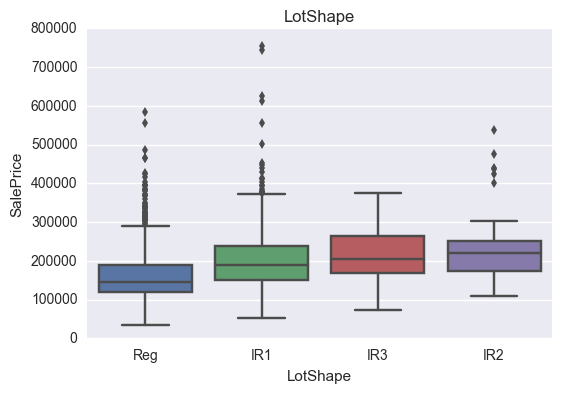

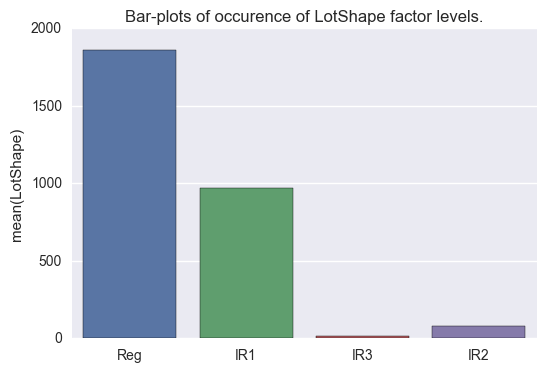

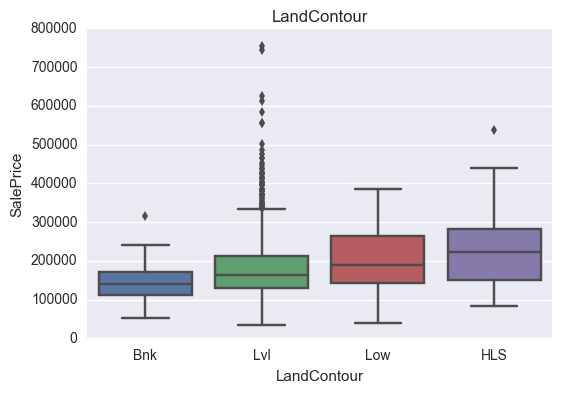

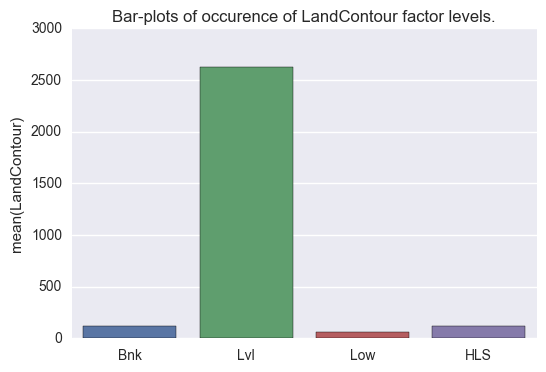

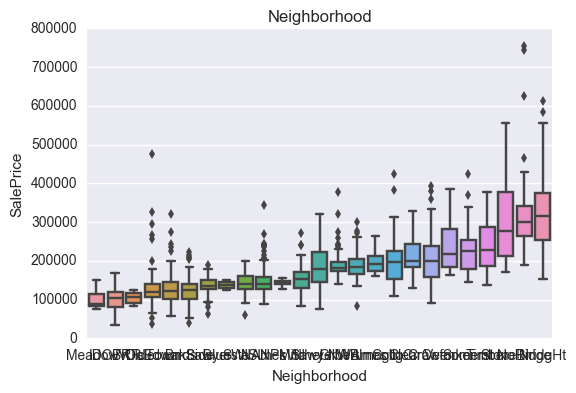

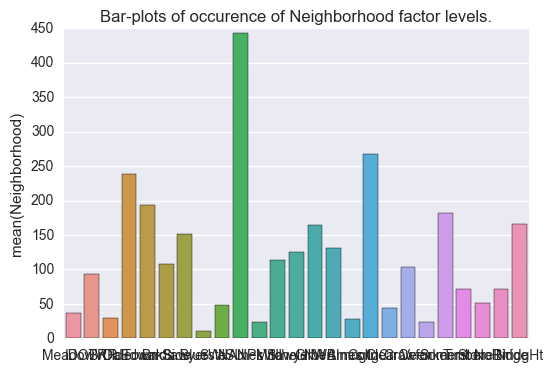

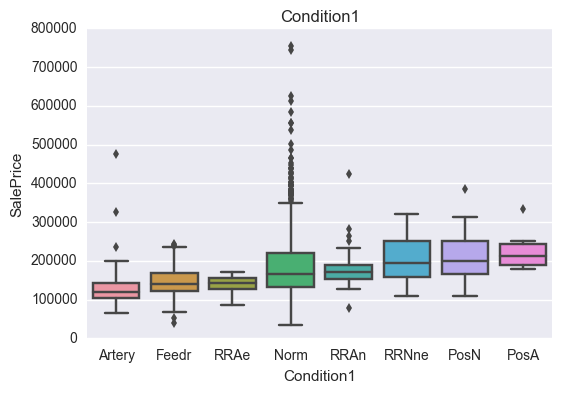

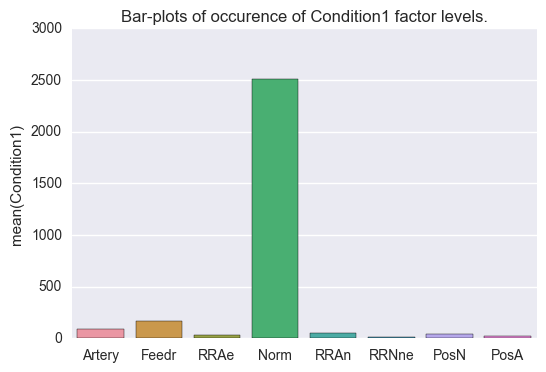

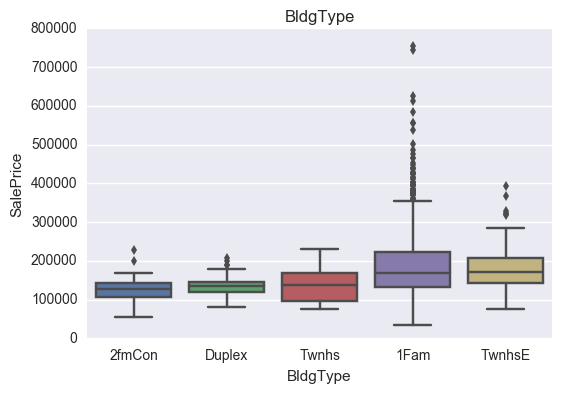

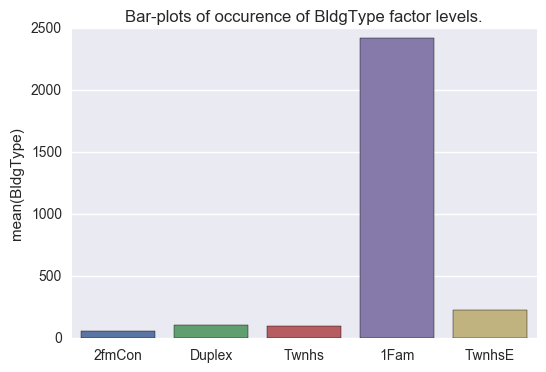

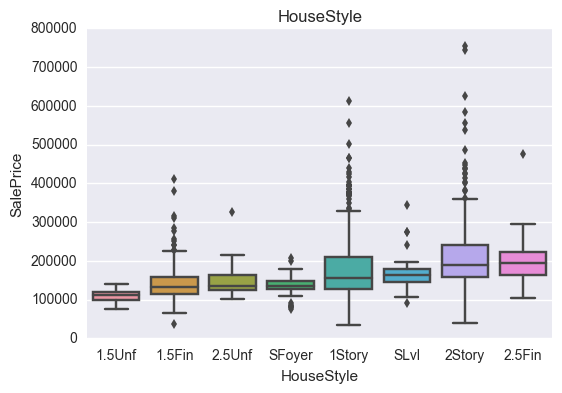

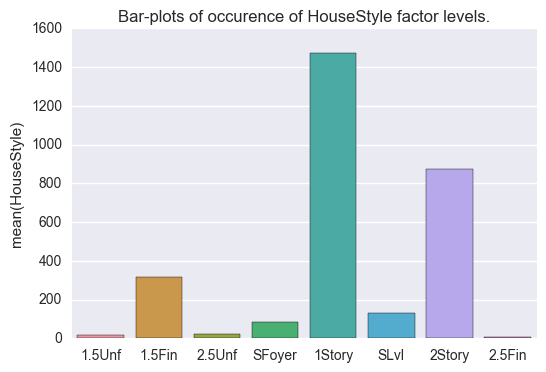

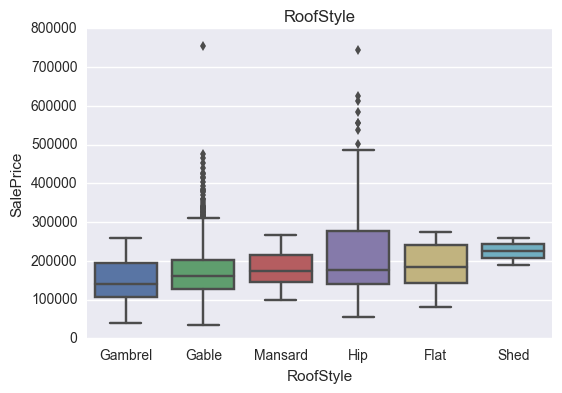

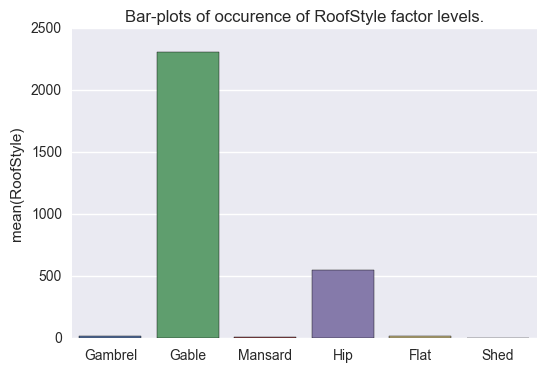

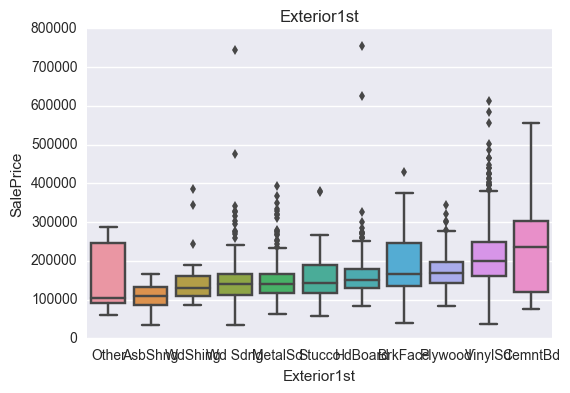

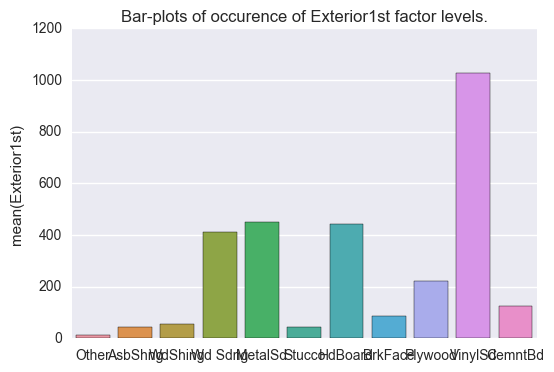

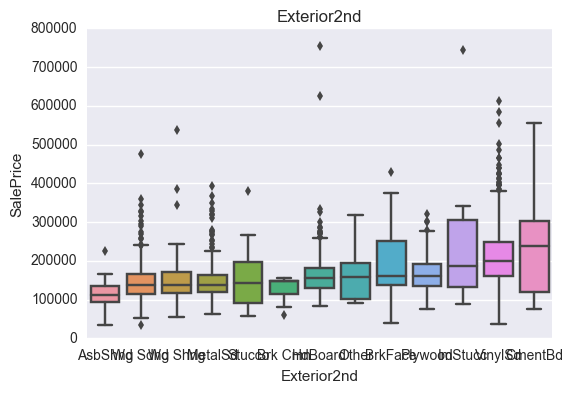

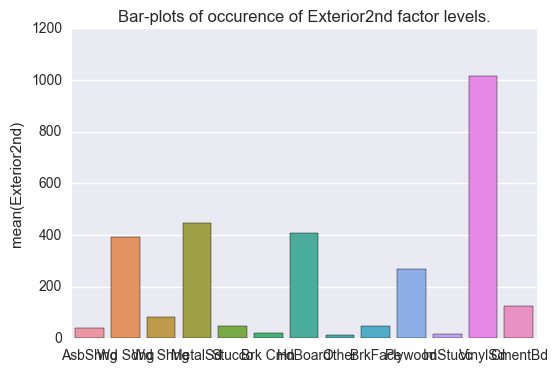

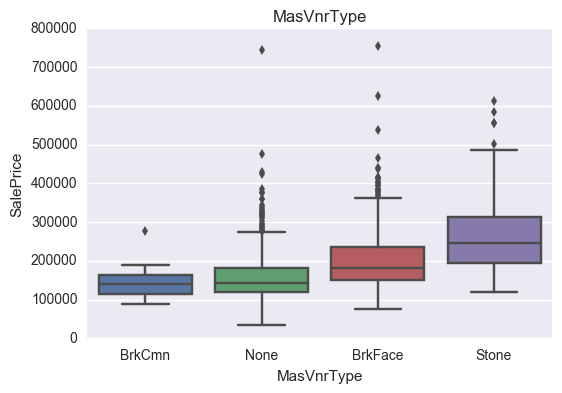

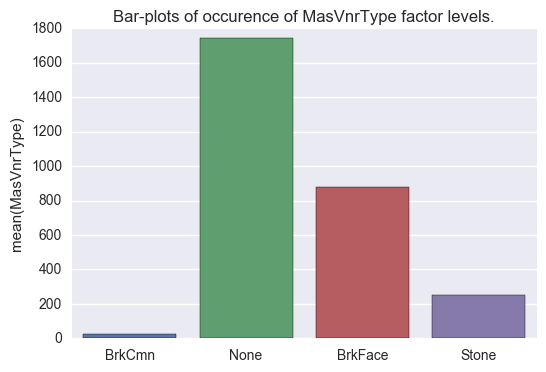

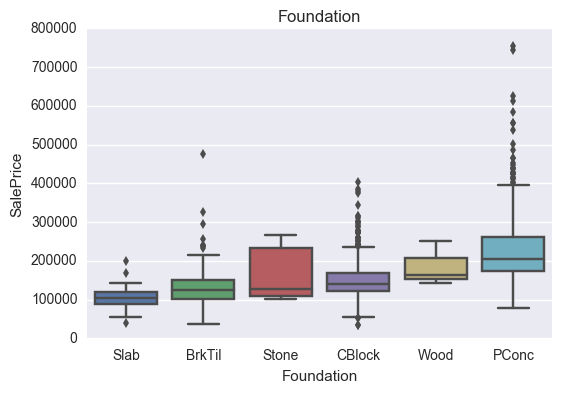

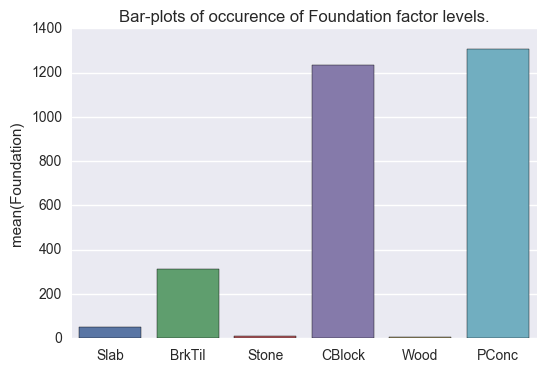

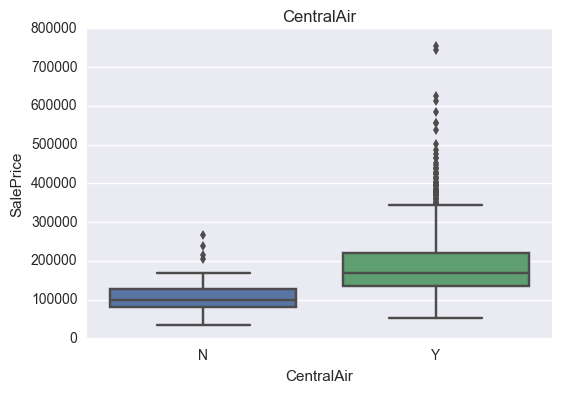

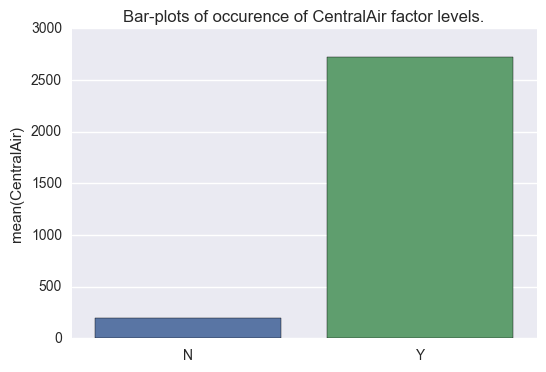

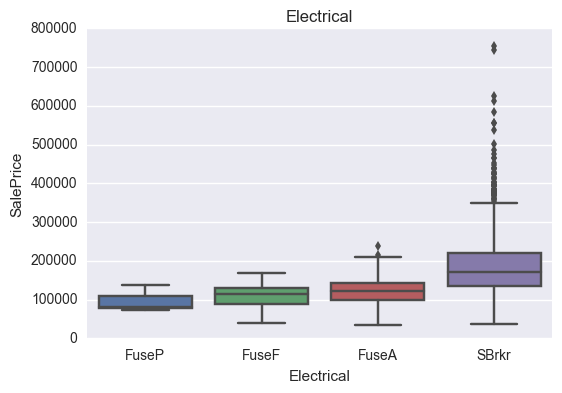

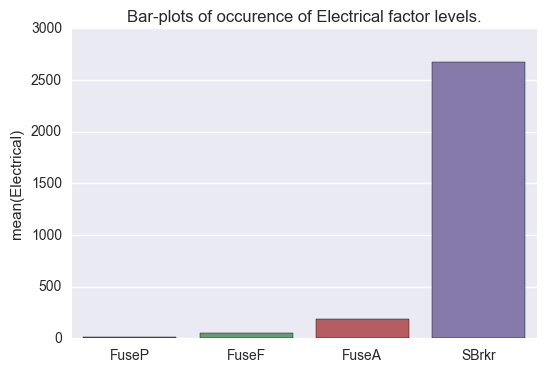

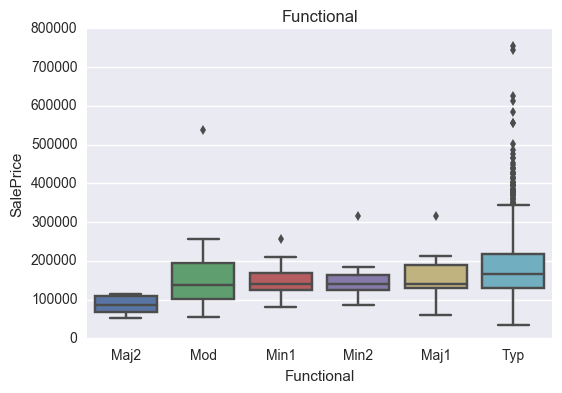

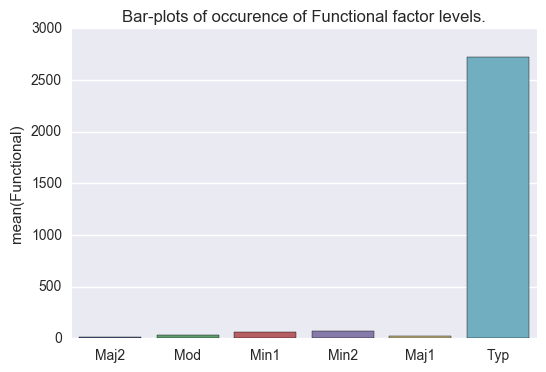

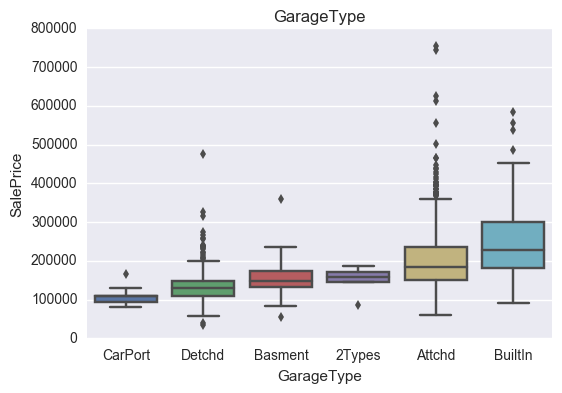

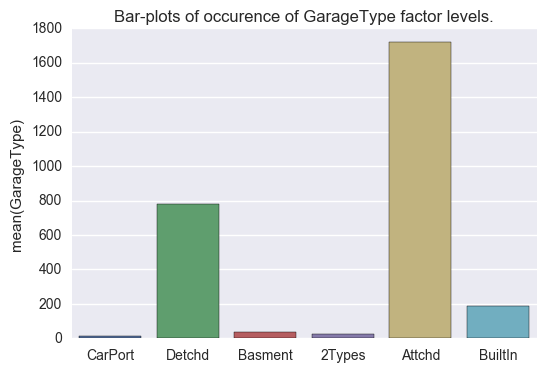

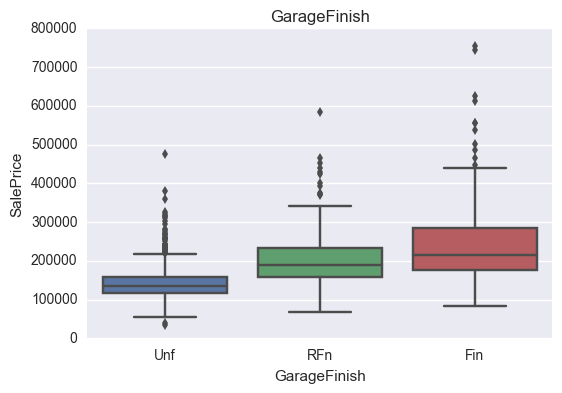

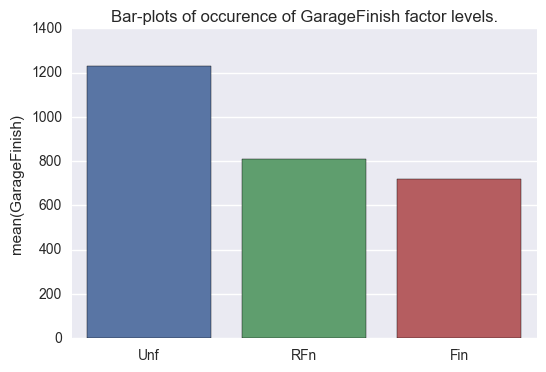

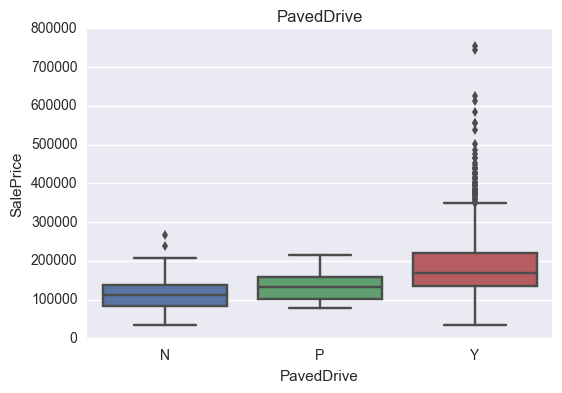

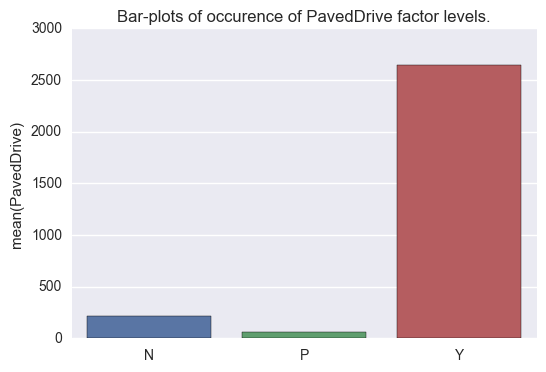

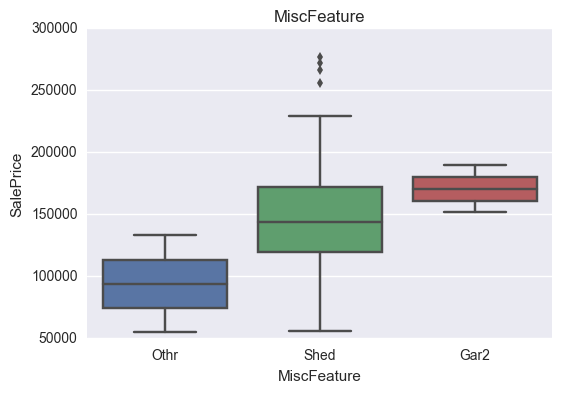

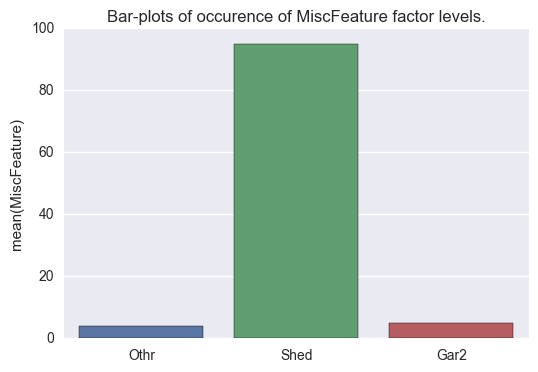

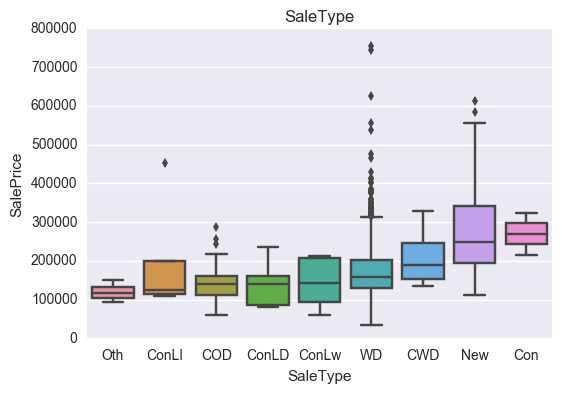

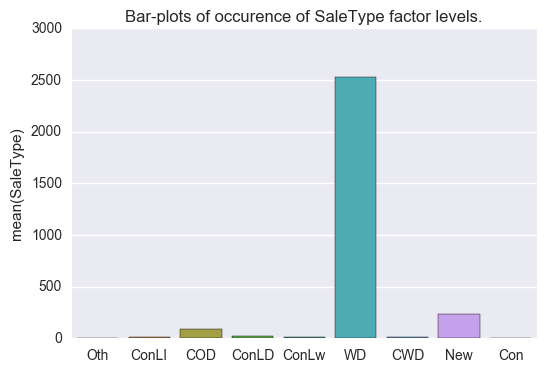

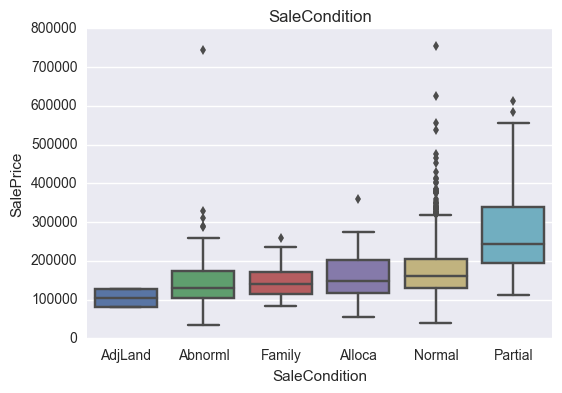

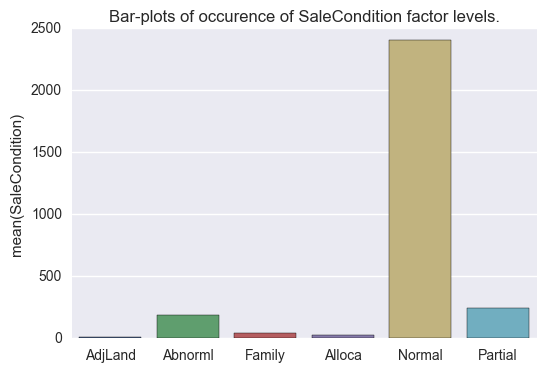

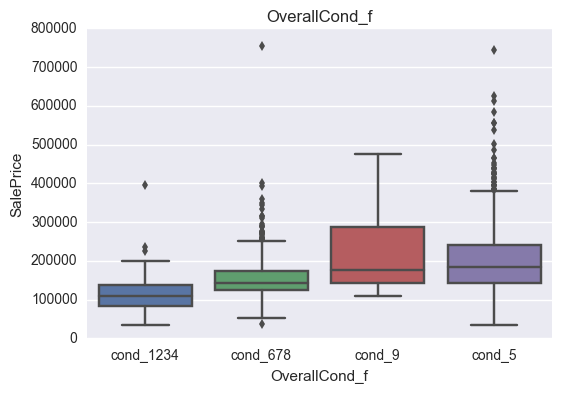

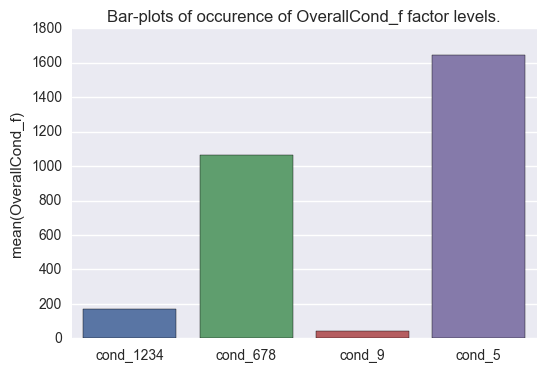

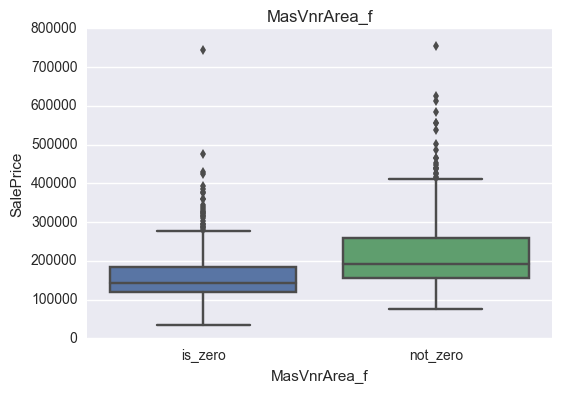

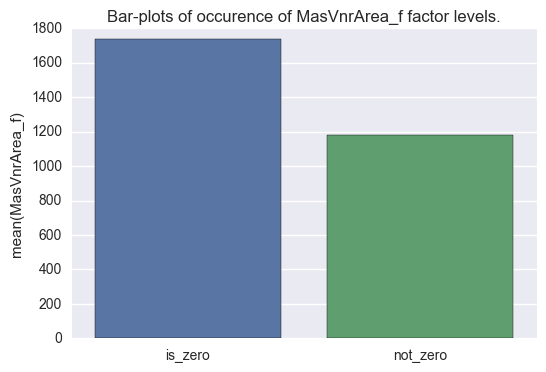

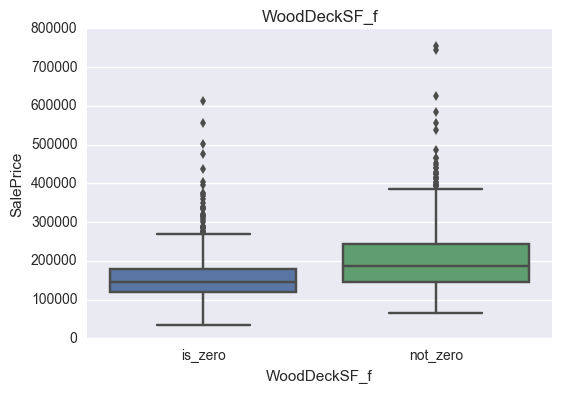

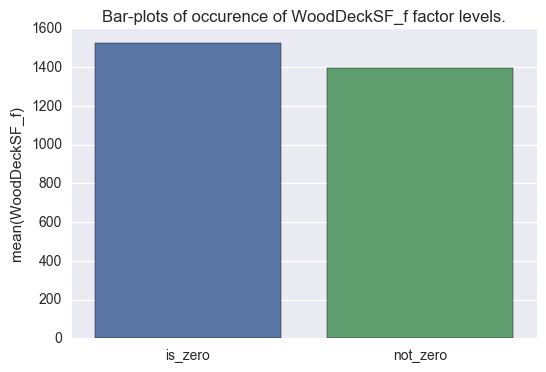

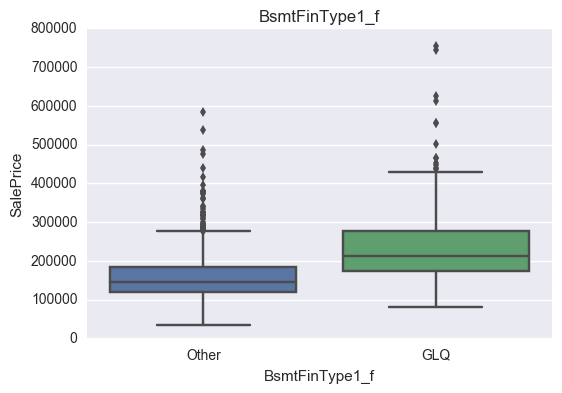

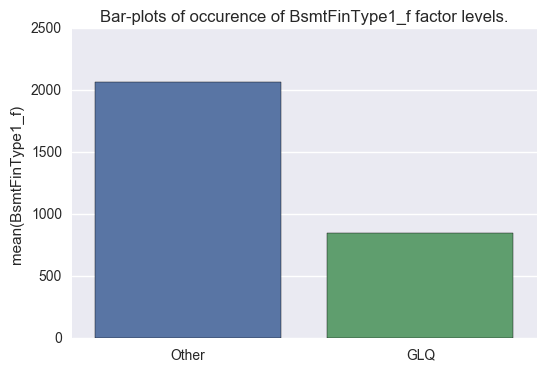

In [63]:
for col in data.iloc[:, 1:]: 
    if data[col].dtypes == object:
        plt.figure()
        medians = data.groupby(col)['SalePrice'].median().sort_values(ascending=True)
        med_idx = medians.index
        sns.boxplot(x=col, y='SalePrice', data=data, order=med_idx)
        plt.title(col)
        
        plt.figure()
        # sort the x-index by order of the counts values
        # sns.barplot(x=pd.value_counts(data[col]).index, y=pd.value_counts(data[col]).sort_values(ascending=True), data=data)
        
        # sort the x-index by order of medians values as the boxplot
        sns.barplot(x=pd.value_counts(data[col]).index, y=pd.value_counts(data[col]), data=data, order=med_idx)
        plt.title('Bar-plots of occurence of {} factor levels.'.format(col))

/Users/weiwei/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


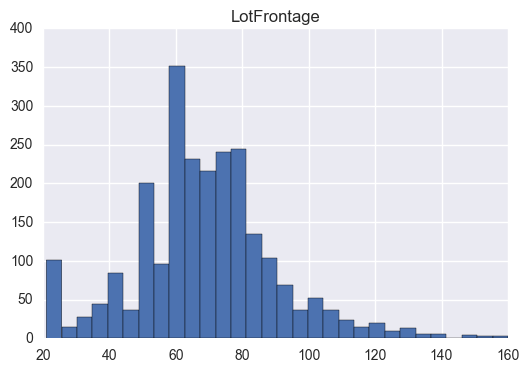

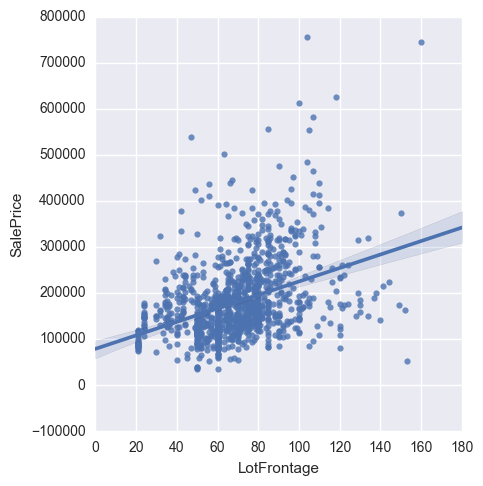

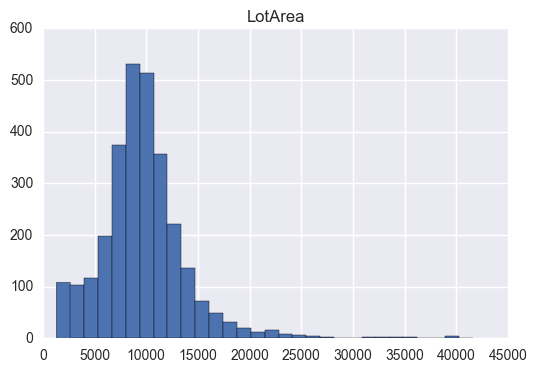

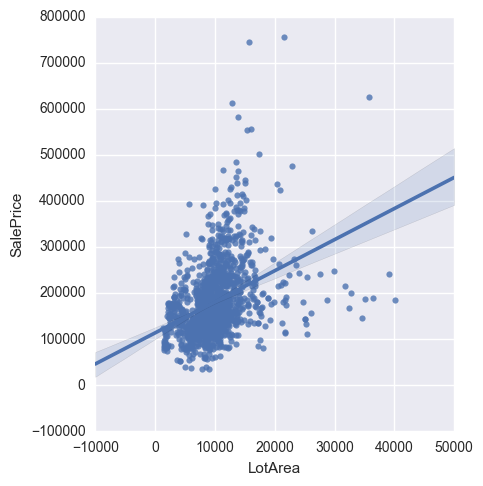

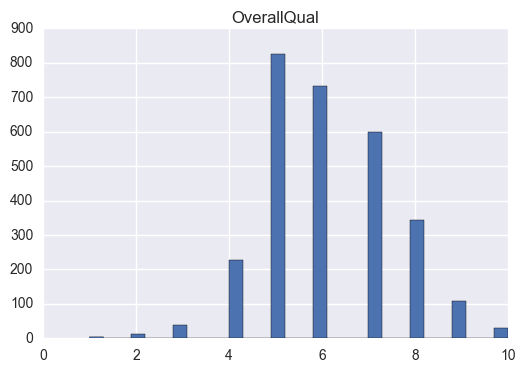

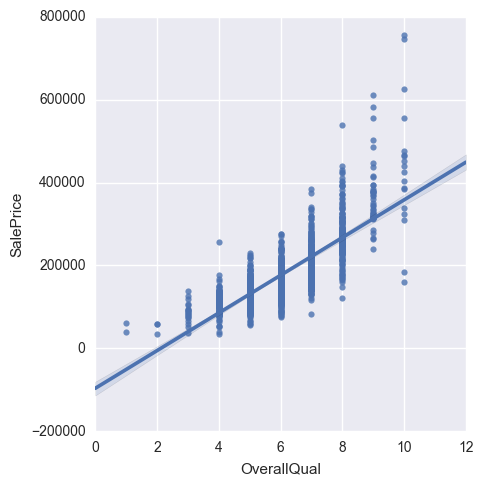

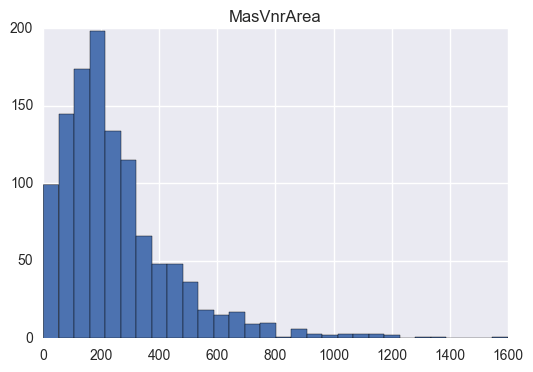

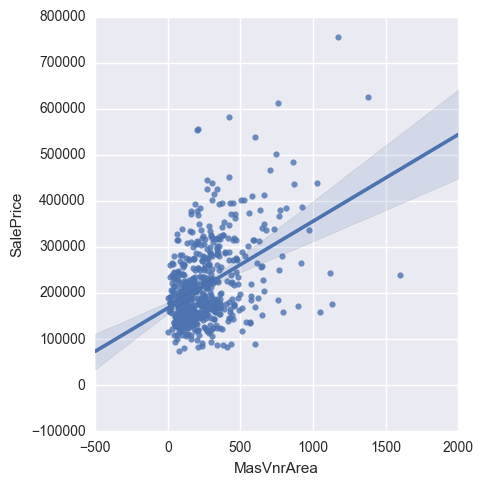

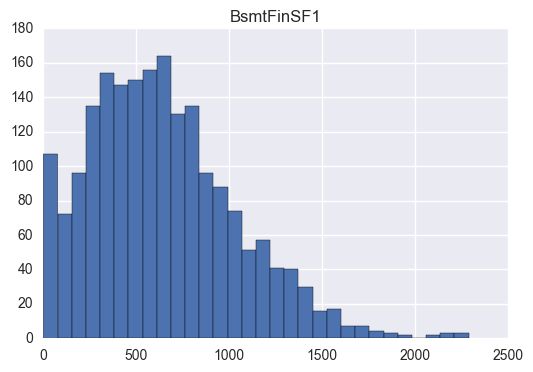

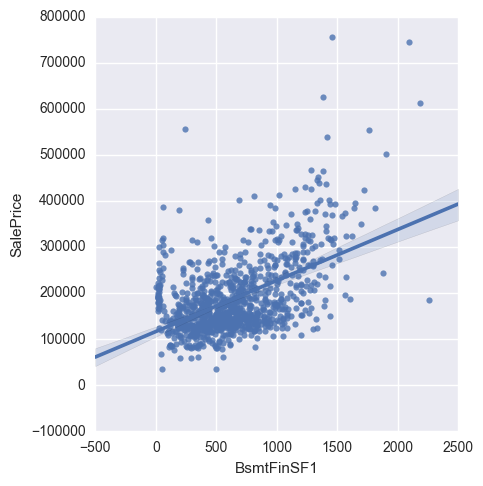

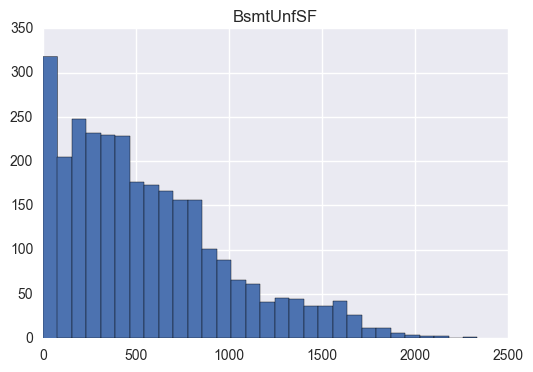

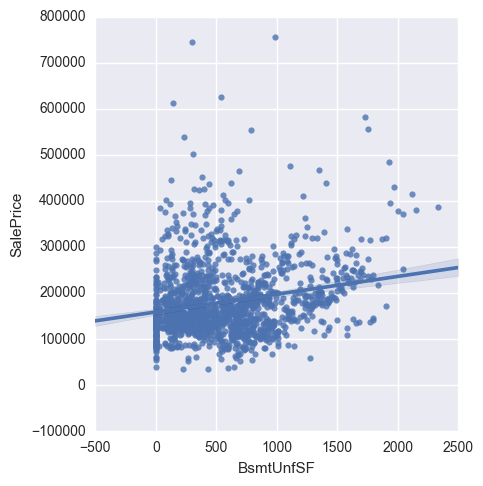

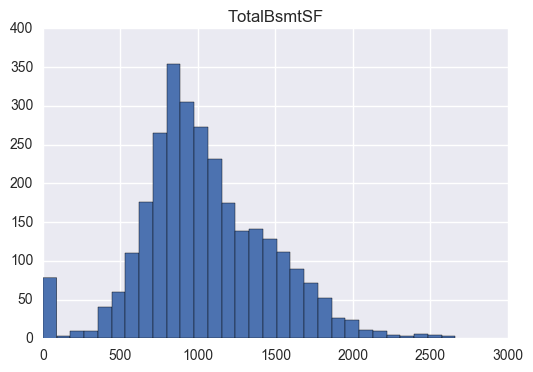

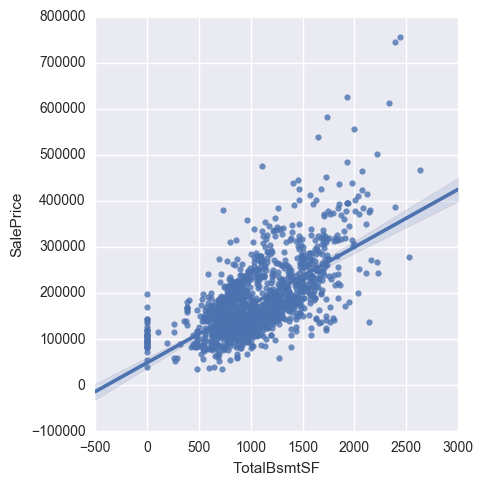

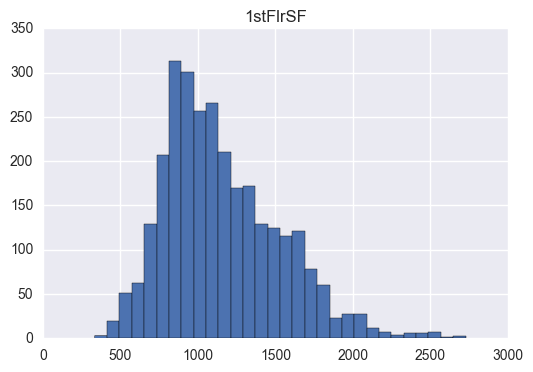

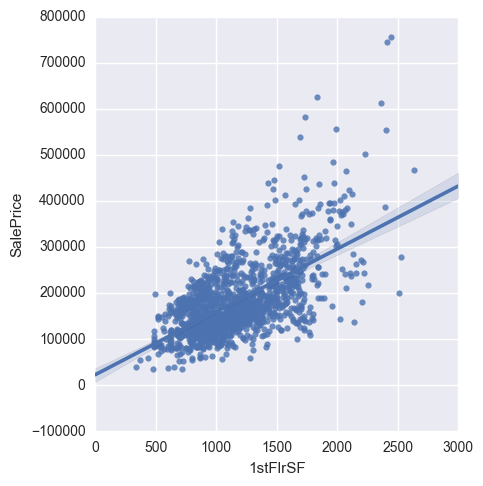

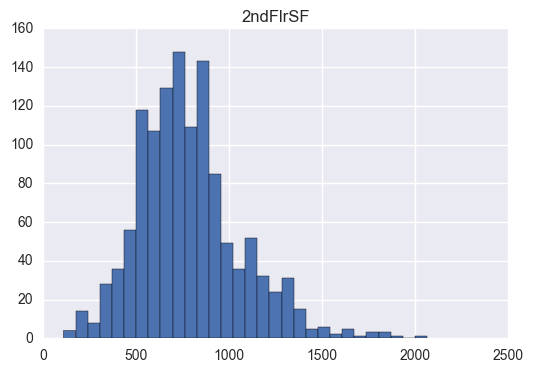

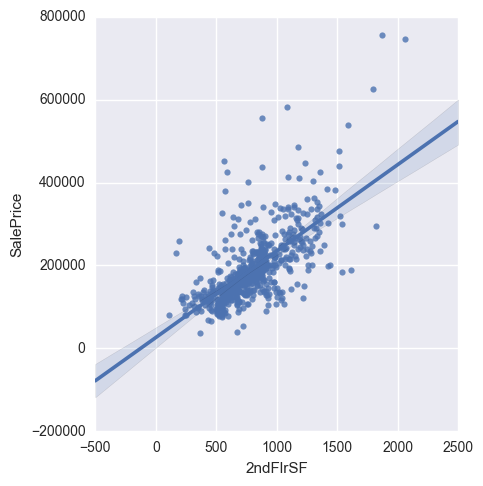

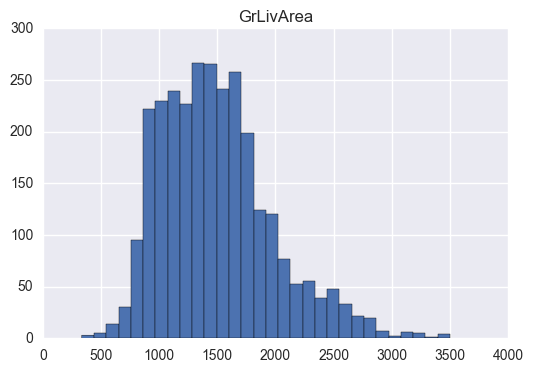

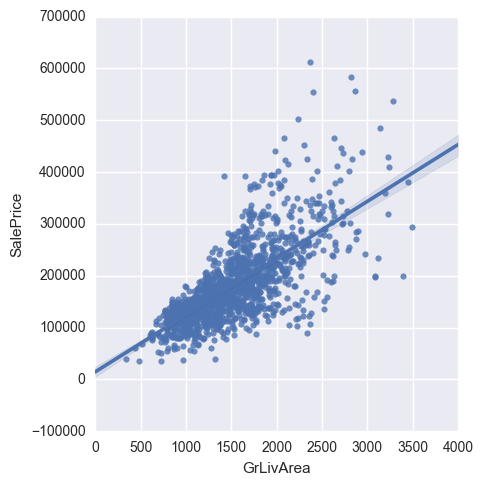

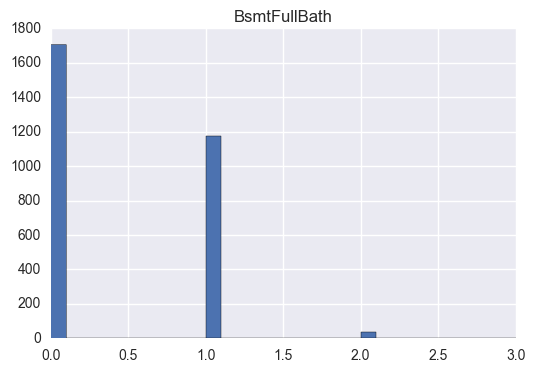

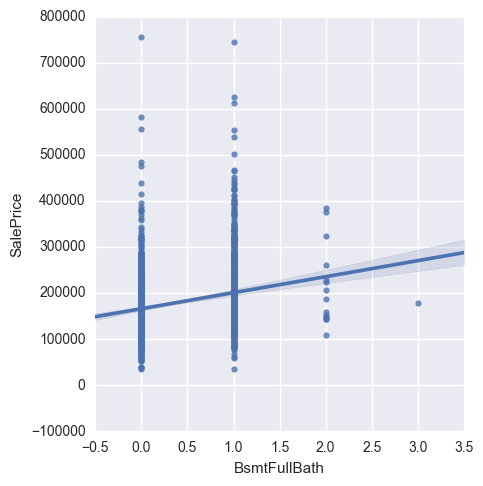

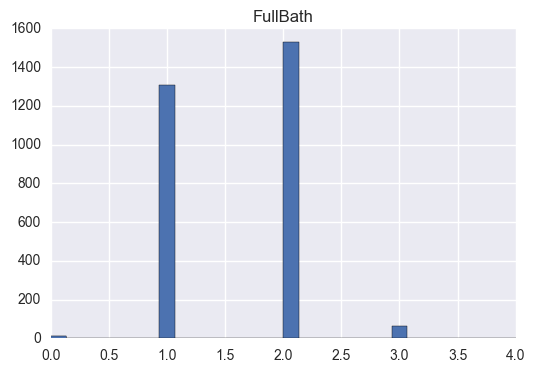

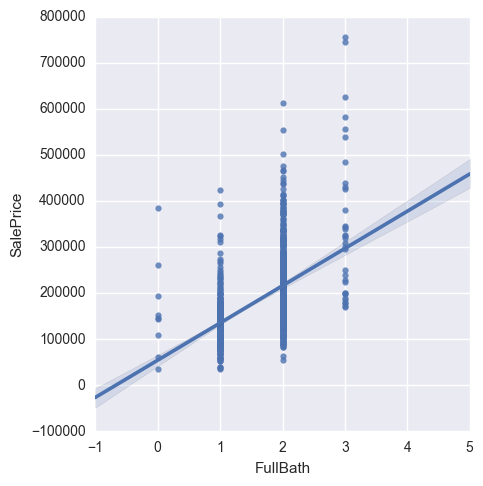

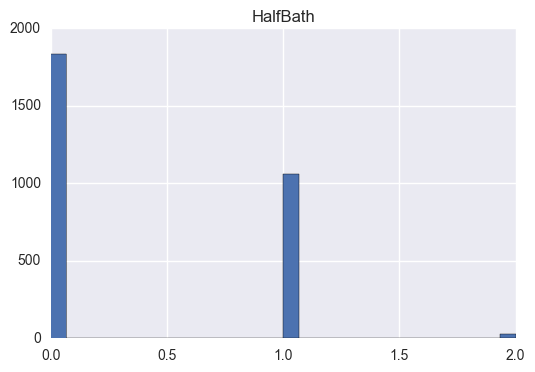

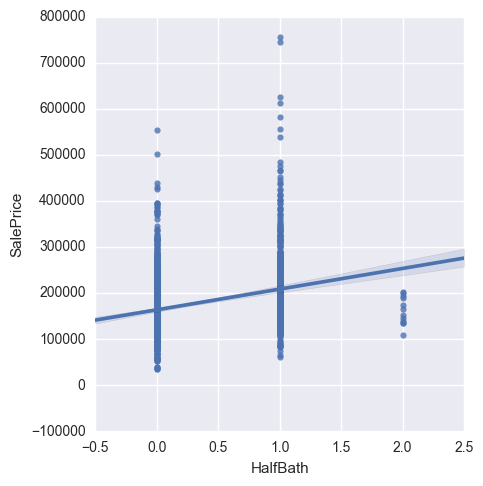

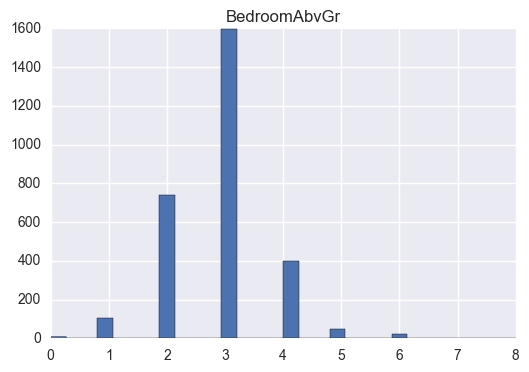

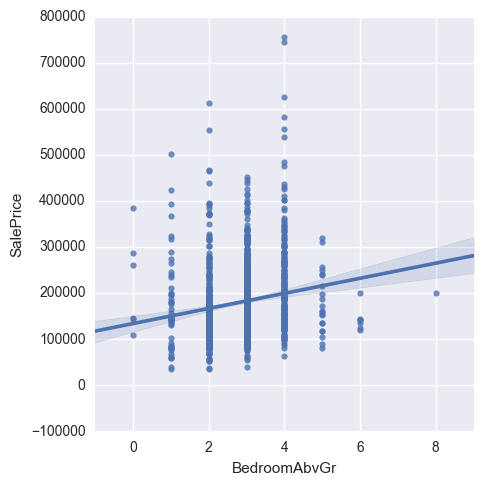

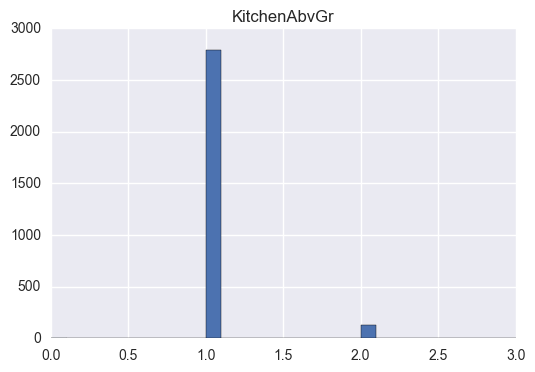

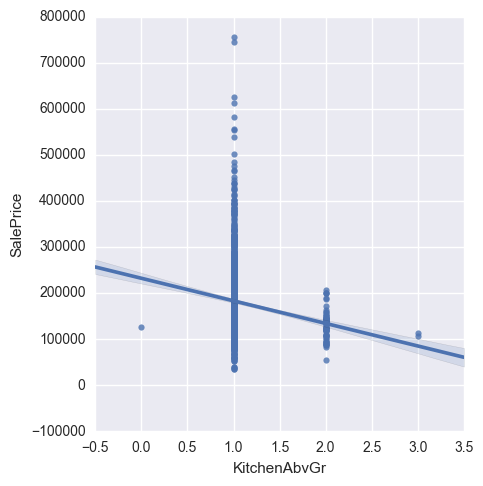

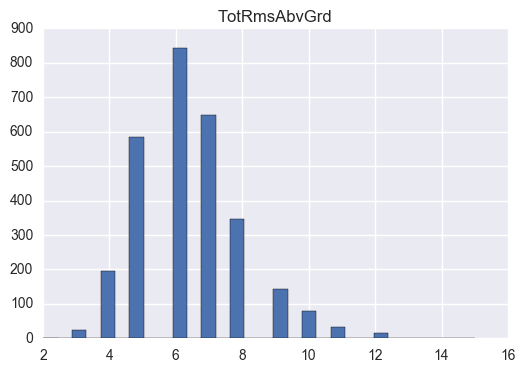

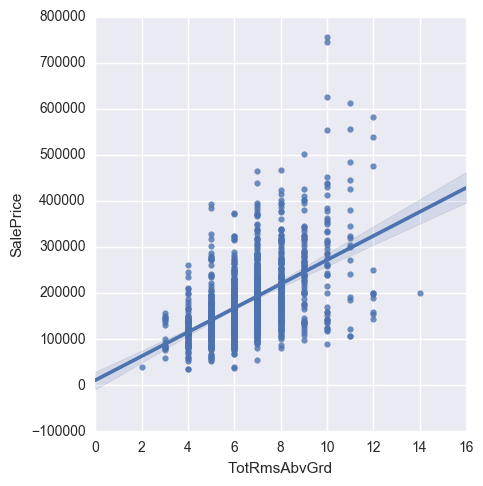

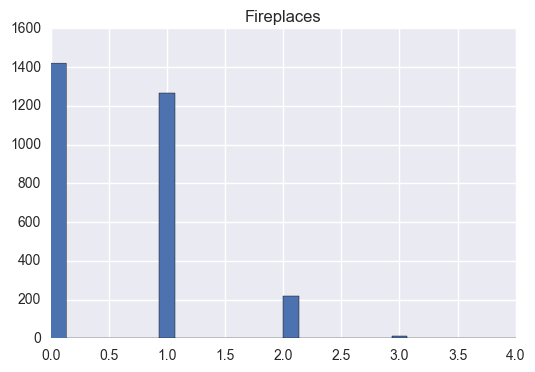

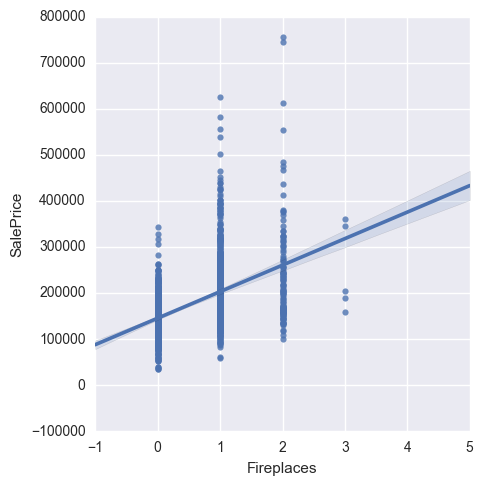

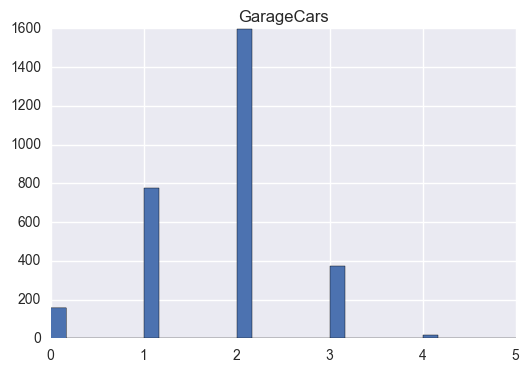

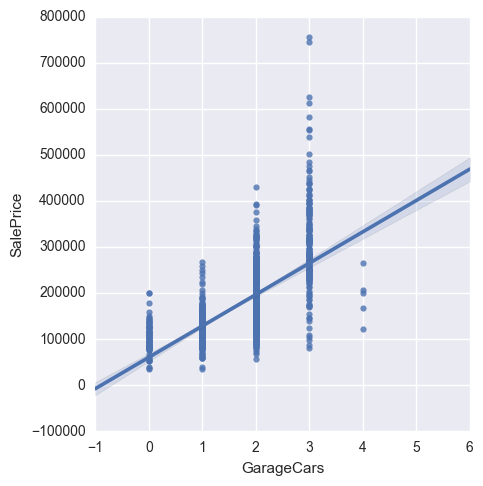

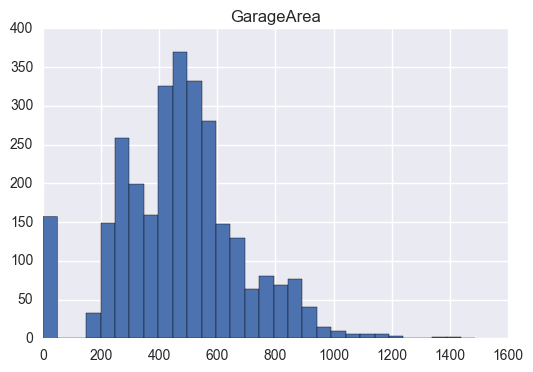

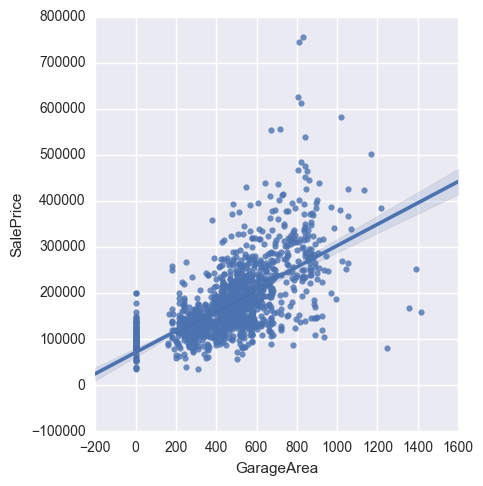

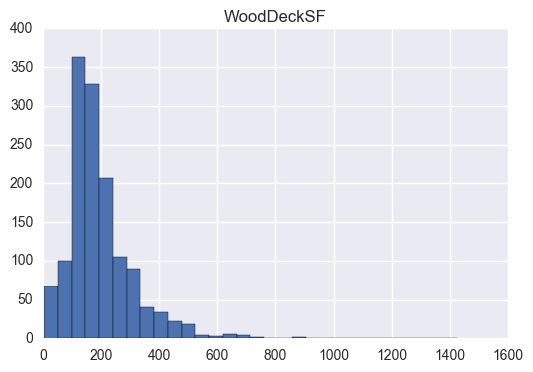

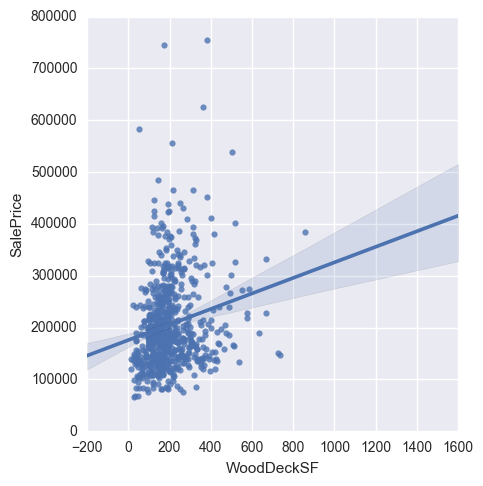

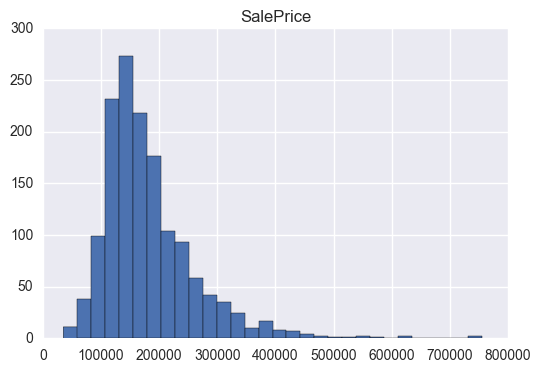

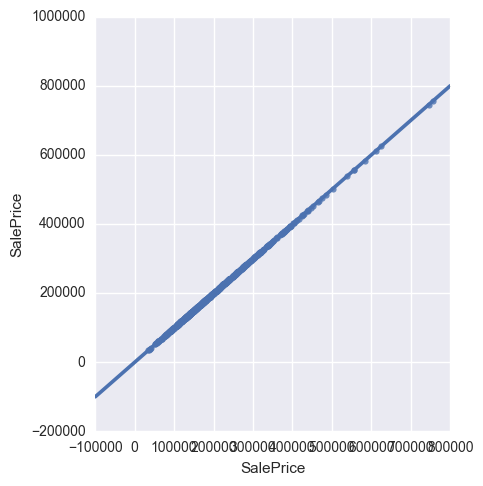

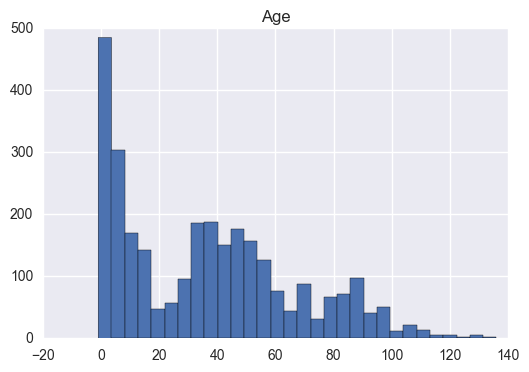

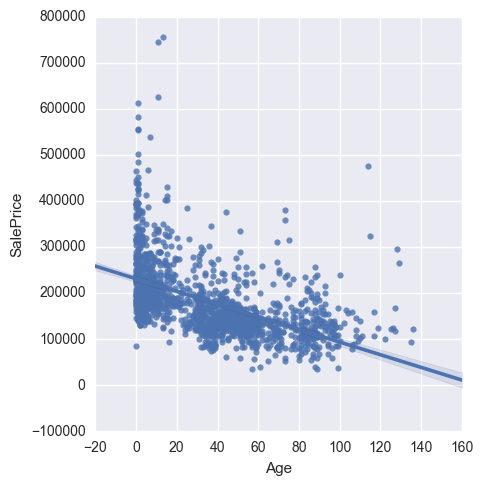

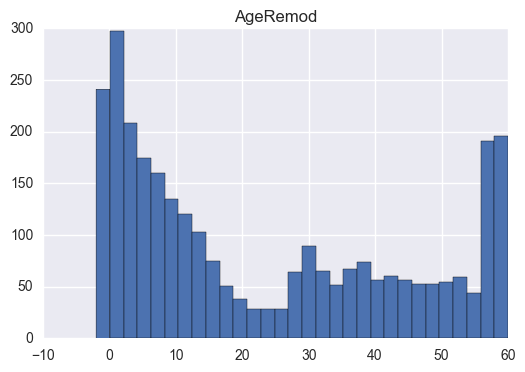

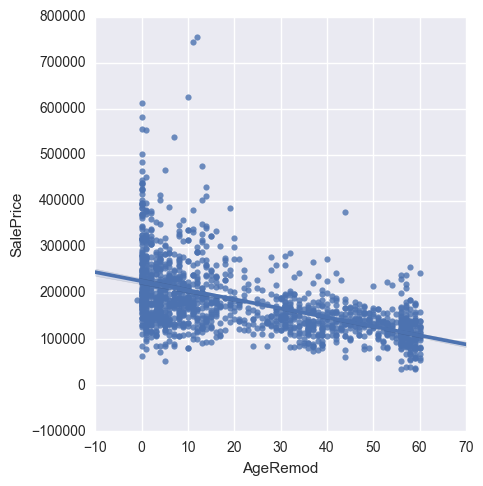

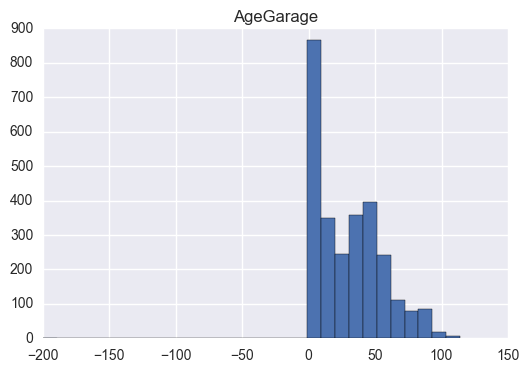

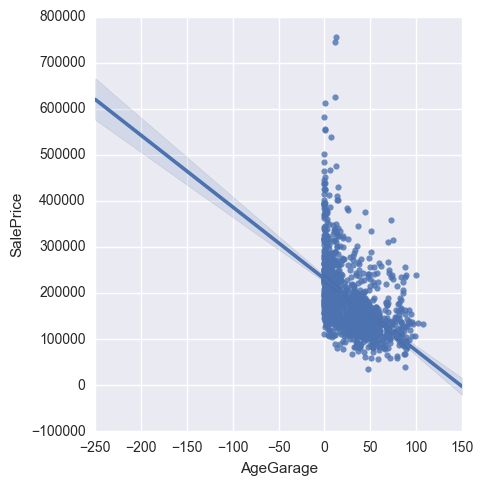

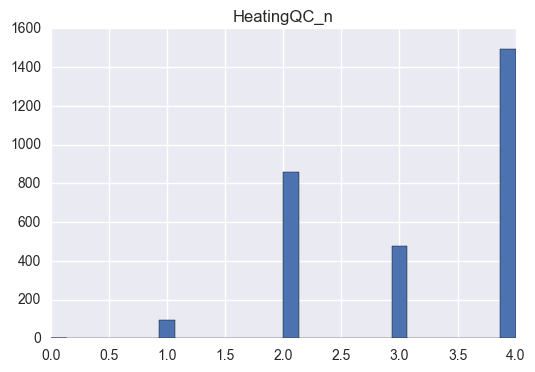

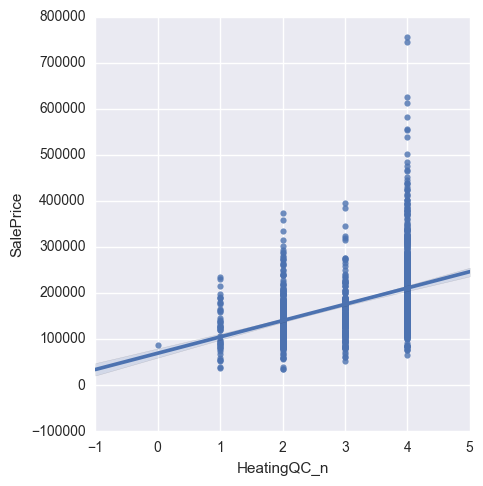

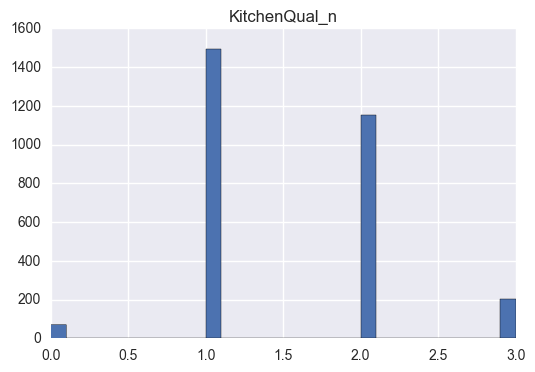

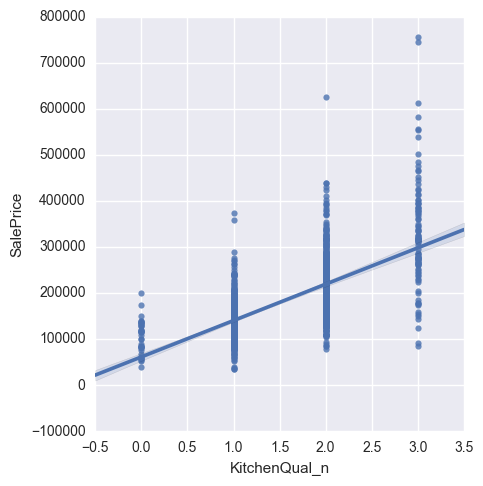

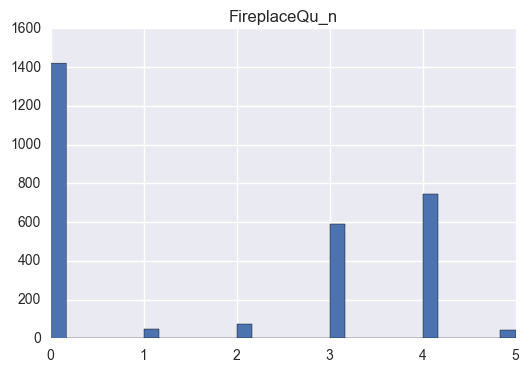

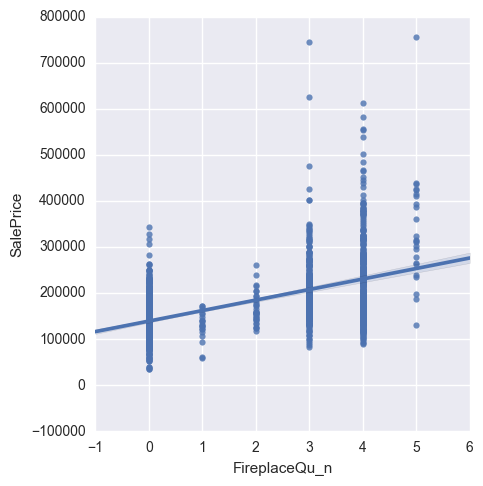

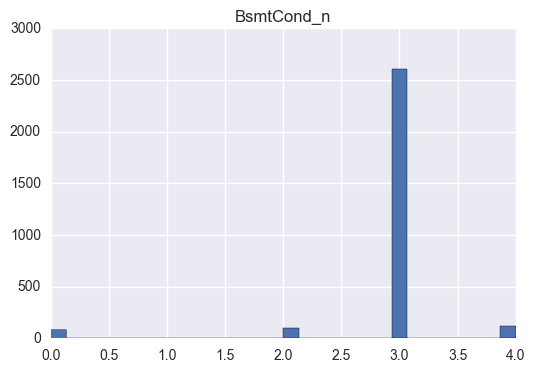

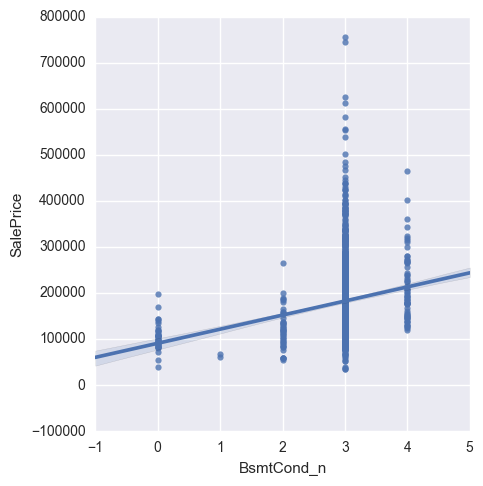

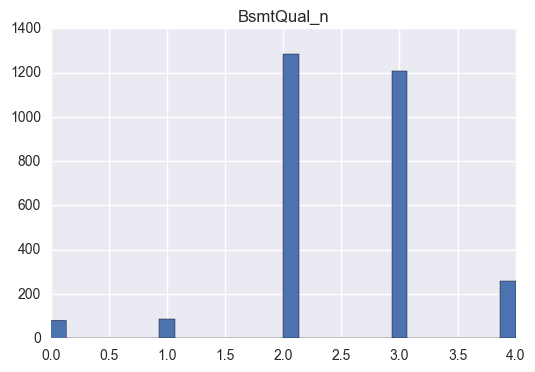

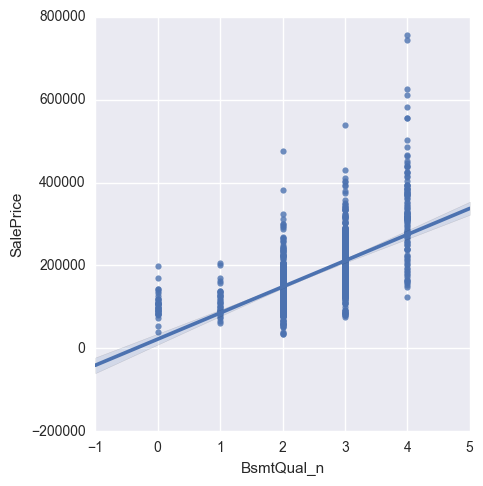

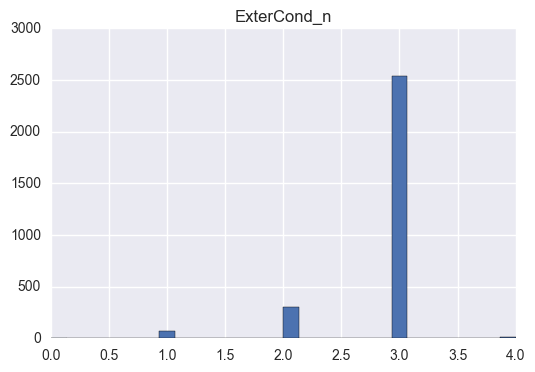

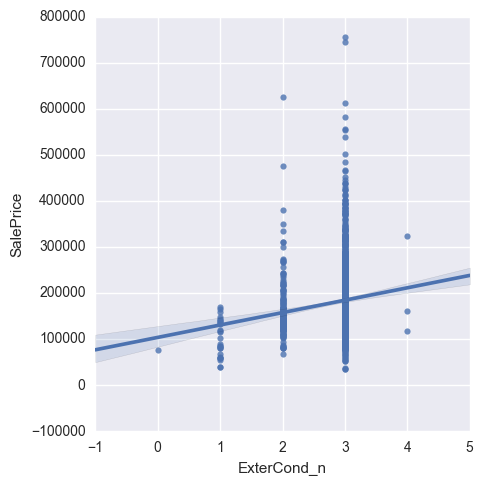

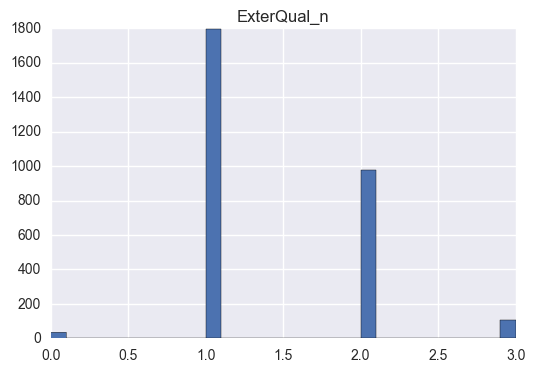

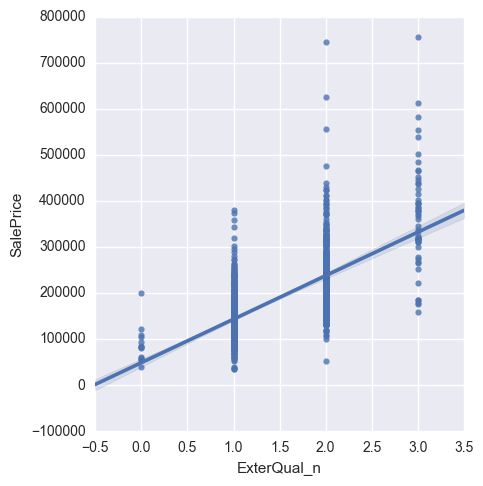

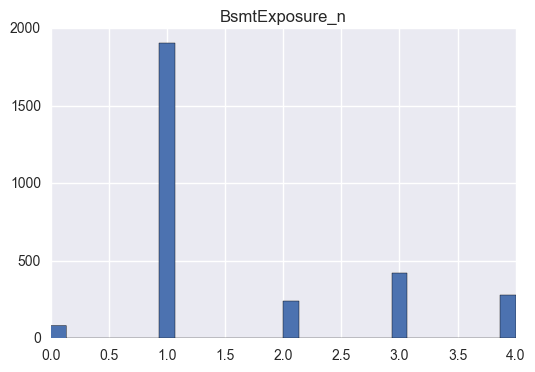

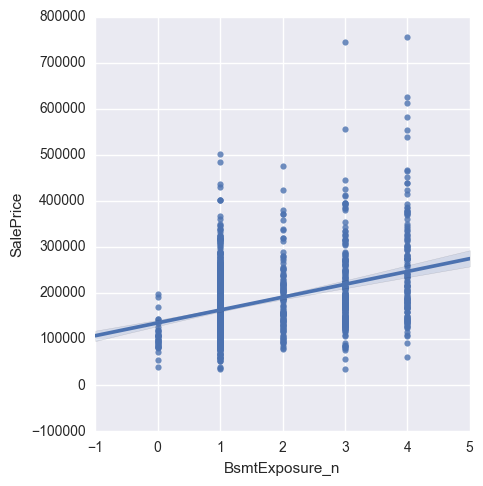

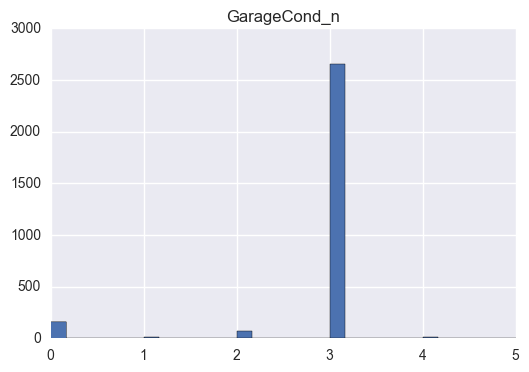

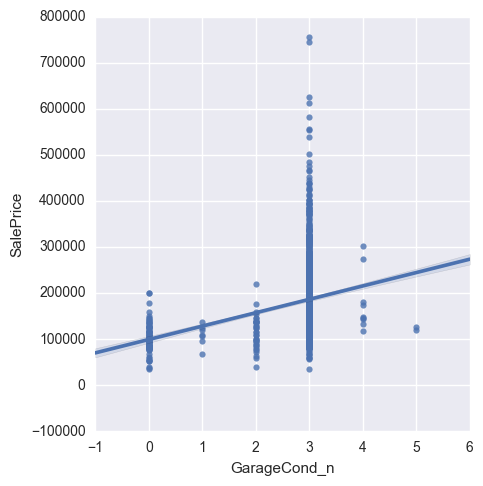

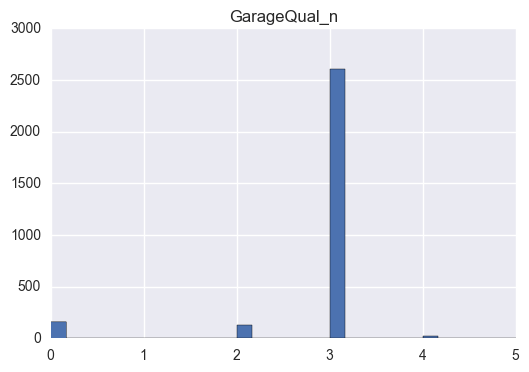

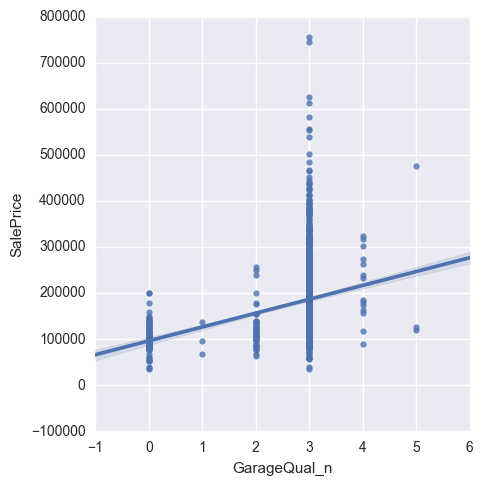

In [64]:
for col in data.iloc[:, 1:]: 
    if (data[col].dtypes == int) | (data[col].dtypes == float):
        plt.figure()
        plt.hist(data[col].dropna(), bins=30)  # must dropna, otherwise error with the histgrams, bins control number of bars
        plt.title(col)
        sns.lmplot(x=col, y='SalePrice', data=data)
       

In [65]:
display(data.head(3))
display(data.tail(3))
data.shape

Id MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1         60       RL         65.0   8450.0   NaN      Reg         Lvl   
1   2         20       RL         80.0   9600.0   NaN      Reg         Lvl   
2   3         60       RL         68.0  11250.0   NaN      IR1         Lvl   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual RoofStyle  \
0      CollgCr       Norm     1Fam     2Story            7     Gable   
1      Veenker      Feedr     1Fam     1Story            6     Gable   
2      CollgCr       Norm     1Fam     2Story            7     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea Foundation  BsmtFinSF1  \
0     VinylSd     VinylSd    BrkFace       196.0      PConc       706.0   
1     MetalSd     MetalSd       None         NaN     CBlock       978.0   
2     VinylSd     VinylSd    BrkFace       162.0      PConc       486.0   

   BsmtUnfSF  TotalBsmtSF CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0      150.0        856.0          Y      SBrkr     856.0     854.0   
1      284.0       1262.0          Y      SBrkr    1262.0       NaN   
2      434.0        920.0          Y      SBrkr     920.0     866.0   

   GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0     1710.0           1.0         2         1             3             1   
1     1262.0           0.0         2         0             3             1   
2     1786.0           1.0         2         1             3             1   

   TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  GarageCars  \
0             8        Typ           0     Attchd          RFn         2.0   
1             6        Typ           1     Attchd          RFn         2.0   
2             6        Typ           1     Attchd          RFn         2.0   

   GarageArea PavedDrive  WoodDeckSF MiscFeature SaleType SaleCondition  \
0       548.0          Y         NaN         NaN       WD        Normal   
1       460.0          Y       298.0         NaN       WD        Normal   
2       608.0          Y         NaN         NaN       WD        Normal   

   SalePrice  Age  AgeRemod  AgeGarage OverallCond_f MasVnrArea_f  \
0   208500.0    5         5        5.0        cond_5     not_zero   
1   181500.0   31        31       31.0      cond_678      is_zero   
2   223500.0    7         6        7.0        cond_5     not_zero   

  WoodDeckSF_f  HeatingQC_n  KitchenQual_n  FireplaceQu_n  BsmtCond_n  \
0      is_zero            4            2.0              0           3   
1     not_zero            4            1.0              3           3   
2      is_zero            4            2.0              3           3   

   BsmtQual_n  ExterCond_n  ExterQual_n  BsmtExposure_n BsmtFinType1_f  \
0           3            3            2               1            GLQ   
1           3            3            1               4          Other   
2           3            3            2               2            GLQ   

   GarageCond_n  GarageQual_n  
0             3             3  
1             3             3  
2             3             3

Id MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape  \
2916  2917         20       RL        160.0  20000.0   NaN      Reg   
2917  2918         85       RL         62.0  10441.0   NaN      Reg   
2918  2919         60       RL         74.0   9627.0   NaN      Reg   

     LandContour Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
2916         Lvl      Mitchel       Norm     1Fam     1Story            5   
2917         Lvl      Mitchel       Norm     1Fam     SFoyer            5   
2918         Lvl      Mitchel       Norm     1Fam     2Story            7   

     RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea Foundation  \
2916     Gable     VinylSd     VinylSd       None         NaN     CBlock   
2917     Gable     HdBoard     Wd Shng       None         NaN      PConc   
2918     Gable     HdBoard     HdBoard    BrkFace        94.0      PConc   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF CentralAir Electrical  1stFlrSF  \
2916      1224.0        0.0       1224.0          Y      SBrkr    1224.0   
2917       337.0      575.0        912.0          Y      SBrkr     970.0   
2918       758.0      238.0        996.0          Y      SBrkr     996.0   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
2916       NaN     1224.0           1.0         1         0             4   
2917       NaN      970.0           0.0         1         0             3   
2918    1004.0     2000.0           0.0         2         1             3   

      KitchenAbvGr  TotRmsAbvGrd Functional  Fireplaces GarageType  \
2916             1             7        Typ           1     Detchd   
2917             1             6        Typ           0        NaN   
2918             1             9        Typ           1     Attchd   

     GarageFinish  GarageCars  GarageArea PavedDrive  WoodDeckSF MiscFeature  \
2916          Unf         2.0       576.0          Y       474.0         NaN   
2917          NaN         0.0         0.0          Y        80.0        Shed   
2918          Fin         3.0       650.0          Y       190.0         NaN   

     SaleType SaleCondition  SalePrice  Age  AgeRemod  AgeGarage  \
2916       WD       Abnorml        NaN   46        10       46.0   
2917       WD        Normal        NaN   14        14        NaN   
2918       WD        Normal        NaN   13        12       13.0   

     OverallCond_f MasVnrArea_f WoodDeckSF_f  HeatingQC_n  KitchenQual_n  \
2916      cond_678      is_zero     not_zero            4            1.0   
2917        cond_5      is_zero     not_zero            2            1.0   
2918        cond_5     not_zero     not_zero            4            1.0   

      FireplaceQu_n  BsmtCond_n  BsmtQual_n  ExterCond_n  ExterQual_n  \
2916              3           3           2            3            1   
2917              0           3           3            3            1   
2918              3           3           3            3            1   

      BsmtExposure_n BsmtFinType1_f  GarageCond_n  GarageQual_n  
2916               1          Other             3             3  
2917               3            GLQ             0             0  
2918               3          Other             3             3

(2919, 62)

## D. Covert categorical variables to dummies using pd.get_dummy()

In [66]:
# dummy code categorical variables
factor_cols = data.dtypes[data.dtypes == object].index
dummies = pd.get_dummies( data[factor_cols] )
print(dummies.shape)
dummies.head(3)

(2919, 169)


MSSubClass_120  MSSubClass_150  MSSubClass_160  MSSubClass_180  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0              0              0              0              0   
1               0              1              0              0              0   
2               0              0              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0              0              0                 0            0            0   
1              0              0                 0            0            0   
2              0              0                 0            0            0   

   MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_Pave  LotShape_IR1  \
0            1            0           0           0             0   
1            1            0           0           0             0   
2            1            0           0           0             1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   

   LandContour_Low  LandContour_Lvl  Neighborhood_Blmngtn  \
0                0                1                     0   
1                0                1                     0   
2                0                1                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0  

In [67]:
# select dataframe columns by types
num_cols = data.select_dtypes([int, float])
print(num_cols.shape)
num_cols.head()

(2919, 35)


Id  LotFrontage  LotArea  OverallQual  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
0   1         65.0   8450.0            7       196.0       706.0      150.0   
1   2         80.0   9600.0            6         NaN       978.0      284.0   
2   3         68.0  11250.0            7       162.0       486.0      434.0   
3   4         60.0   9550.0            7         NaN       216.0      540.0   
4   5         84.0  14260.0            8       350.0       655.0      490.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0        856.0     856.0     854.0     1710.0           1.0         2   
1       1262.0    1262.0       NaN     1262.0           0.0         2   
2        920.0     920.0     866.0     1786.0           1.0         2   
3        756.0     961.0     756.0     1717.0           1.0         1   
4       1145.0    1145.0    1053.0     2198.0           1.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0         2.0   
1         0             3             1             6           1         2.0   
2         1             3             1             6           1         2.0   
3         0             3             1             7           1         3.0   
4         1             4             1             9           1         3.0   

   GarageArea  WoodDeckSF  SalePrice  Age  AgeRemod  AgeGarage  HeatingQC_n  \
0       548.0         NaN   208500.0    5         5        5.0            4   
1       460.0       298.0   181500.0   31        31       31.0            4   
2       608.0         NaN   223500.0    7         6        7.0            4   
3       642.0         NaN   140000.0   91        36        8.0            3   
4       836.0       192.0   250000.0    8         8        8.0            4   

   KitchenQual_n  FireplaceQu_n  BsmtCond_n  BsmtQual_n  ExterCond_n  \
0            2.0              0           3           3            3   
1            1.0              3           3           3            3   
2            2.0              3           3           3            3   
3            2.0              4           4           2            3   
4            2.0              3           3           3            3   

   ExterQual_n  BsmtExposure_n  GarageCond_n  GarageQual_n  
0            2               1             3             3  
1            1               4             3             3  
2            2               2             3             3  
3            1               1             3             3  
4            2               3             3             3

In [68]:
# merge the 2 sets of columns
frames = [num_cols, dummies]
df = pd.concat(frames, axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True) # ignore_index=True
df.shape

(2919, 204)

In [69]:
# id the numeric index of outcome variable 'SalePrice'
SalePrice_idx = df.columns.get_loc('SalePrice')
SalePrice_idx

21

In [70]:
for col in df:
    if df[col].isnull().sum() > 0:
        print('{} column has {} missing values.'.format(col, df[col].isnull().sum()))

LotFrontage column has 494 missing values.
LotArea column has 19 missing values.
MasVnrArea column has 1761 missing values.
BsmtFinSF1 column has 932 missing values.
BsmtUnfSF column has 1 missing values.
TotalBsmtSF column has 8 missing values.
1stFlrSF column has 6 missing values.
2ndFlrSF column has 1668 missing values.
GrLivArea column has 9 missing values.
BsmtFullBath column has 2 missing values.
GarageCars column has 1 missing values.
GarageArea column has 1 missing values.
WoodDeckSF column has 1523 missing values.
SalePrice column has 1459 missing values.
AgeGarage column has 159 missing values.
KitchenQual_n column has 1 missing values.


## E. Convert DataFrame to arrays

In [71]:
all = df.values
all

array([[  1.00000000e+00,   6.50000000e+01,   8.45000000e+03, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  2.00000000e+00,   8.00000000e+01,   9.60000000e+03, ...,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  3.00000000e+00,   6.80000000e+01,   1.12500000e+04, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  2.91700000e+03,   1.60000000e+02,   2.00000000e+04, ...,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  2.91800000e+03,   6.20000000e+01,   1.04410000e+04, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  2.91900000e+03,   7.40000000e+01,   9.62700000e+03, ...,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

## F. Train and Predict house prices with sk-learn ML

In [72]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.grid_search import GridSearchCV

/Users/weiwei/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/weiwei/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [73]:
train = all[:train_data.shape[0], 1:]
X_train = np.delete(train, 20, axis=1)
y_train = train[:, 20]
test = all[train_data.shape[0]:df.shape[0], 1:]
X_test = np.delete(test, 20, axis=1)

In [74]:
print(train.shape, test.shape, X_train.shape, y_train.shape, X_test.shape)

(1460, 203) (1459, 203) (1460, 202) (1460,) (1459, 202)


In [75]:
from xgboost.sklearn import XGBRegressor  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 100),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "reg_lambda": [0.01, 0.1, 1, 10, 100],
    "min_child_weight": from_zero_positive    
}

xgbreg = XGBRegressor(objective='reg:linear', nthread=-1, seed=415, missing=np.nan)


In [76]:
from sklearn.model_selection import RandomizedSearchCV
# Init signature: RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score='raise', return_train_score=True)

# the scoring is R^2
gs = RandomizedSearchCV(xgbreg, params, scoring='r2', n_jobs=-1, cv=5, verbose=True, n_iter=100, return_train_score=False)  
gs.fit(X_train, y_train)  
gs.best_params_  

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.6min finished


{'colsample_bytree': 0.71164242109435971,
 'gamma': 1.0240018652385263,
 'learning_rate': 0.16809185869379156,
 'max_depth': 7,
 'min_child_weight': 9.7515893480511924,
 'n_estimators': 82,
 'reg_alpha': 47.925910628559059,
 'reg_lambda': 0.01,
 'subsample': 0.97686622563980763}

In [77]:
gs.best_score_  

0.88549945881949654

In [78]:
y_test = gs.predict(X_test)
y_test

array([ 123731.640625 ,  153625.28125  ,  186628.15625  , ...,
        160676.734375 ,  111642.6484375,  220348.328125 ], dtype=float32)

In [79]:
test_df = pd.DataFrame({'Id': test_data.iloc[:, 0], 'SalePrice': y_test})

In [80]:
# write prediction to file

test_df.to_csv("./pricesPredicted.csv", index=False)

In [81]:
# submission score

# Your submission scored 0.13767

### The submission scored 0.13767.
